# **Análise Exploratória dos Dados (EDA)**


## Configurando o ambiente e fazendo download dos conjuntos de dados



In [0]:
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
!apt-get install libgeos++-dev 
!apt-get -qq install python-cartopy python3-cartopy
!pip install geoplot

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [700 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [782 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 htt

In [0]:
# for some basic operations
import numpy as np 
import pandas as pd 
import datetime
import calendar

# for visualizations
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gpl


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1gXJhtcrcZ-7jFsRfTZXXFcVBKlRA-5qD' # The shareable link
base_dp = 'https://drive.google.com/open?id=1kf85Br9YVKUCTAFt1XQAWnVgXkyh2qsx'
policiais_mortos_link = 'https://drive.google.com/open?id=1vYPSTopm0MJ53PdF6l_L1iu1R_ghncD5' 
populacao = 'https://drive.google.com/open?id=1LwXhSAKn1iMpxVzp9Rw1lNDmuX-CPDZN'
feminicidio = 'https://drive.google.com/open?id=1JAd-cliUKk_CwVCJ0xk0db0seeMe0Err'
delegacias = 'https://drive.google.com/open?id=12fU3Y_TjyiBRqrlxkRUgmzbvX9Nkbl63'
shapefile = 'https://drive.google.com/open?id=1hrGaoz2E9bFzNzPwJJ52Lg-PoQ2u6g-S'
shapefile_cpg = 'https://drive.google.com/open?id=1hrGaoz2E9bFzNzPwJJ52Lg-PoQ2u6g-S'
shapefile_dbf = 'https://drive.google.com/open?id=1D4Aos2T0d7pYuan2c_IZpvM-4oezm6EZ'
shapefile_prj = 'https://drive.google.com/open?id=1GMpKQbTsCfNrjUH9AUcU_AZ-pxmGwIge'
shapefile_shx = 'https://drive.google.com/open?id=11_yeA5MLSrcYyhXfr9jpNhH7NVk5JiZW'

fluff, id = link.split('=')
fluff, id_2 = base_dp.split('=')
fluff, id_3 = policiais_mortos_link.split('=')
fluff, id_4 = populacao.split('=')
fluff, id_5 = feminicidio.split('=')
fluff, id_6 = delegacias.split('=')
fluff, id_7 = shapefile.split('=')
fluff, id_8 = shapefile_cpg.split('=')
fluff, id_9 = shapefile_dbf.split('=')
fluff, id_10 = shapefile_prj.split('=')
fluff, id_11 = shapefile_shx.split('=')

print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fogo-cruzado.csv') 
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile('BaseDPEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_3}) 
downloaded.GetContentFile('PoliciaisMortos.csv')
downloaded = drive.CreateFile({'id':id_4}) 
downloaded.GetContentFile('PopulacaoEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_5}) 
downloaded.GetContentFile('BaseFeminicidioEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_6}) 
downloaded.GetContentFile('delegacias.csv')
downloaded = drive.CreateFile({'id':id_7}) 
downloaded.GetContentFile('brazil.shp')
downloaded = drive.CreateFile({'id':id_8}) 
downloaded.GetContentFile('brazil.cpg')
downloaded = drive.CreateFile({'id':id_9}) 
downloaded.GetContentFile('brazil.dbf')
downloaded = drive.CreateFile({'id':id_10}) 
downloaded.GetContentFile('brazil.prj')
downloaded = drive.CreateFile({'id':id_11}) 
downloaded.GetContentFile('brazil.shx')

1gXJhtcrcZ-7jFsRfTZXXFcVBKlRA-5qD


## Carregando os dados

**População**

In [0]:
population_df = pd.read_csv('PopulacaoEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')


population_df.head()

,CISP,mes,vano,pop_circ
0,1,1,2003,1545.224947
1,1,2,2003,1546.207291
2,1,3,2003,1547.190259
3,1,4,2003,1548.173852
4,1,5,2003,1549.158071


In [0]:
print(len(population_df.index), population_df.shape)

28265 (28265, 4)


**Crimes**

In [0]:
crimes_df = pd.read_csv('BaseDPEvolucaoMensalCisp.csv', encoding='latin-1')
crimes_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.



,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,NaN,4,100,12,30,0,37,NaN,90,169,0,1,0,69,1,,,,5,NaN,NaN,NaN,NaN,21,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,NaN,11,82,9,42,5,23,NaN,36,115,0,1,0,1,35,,,,7,NaN,NaN,NaN,NaN,15,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,NaN,24,123,28,42,2,47,NaN,97,216,0,0,0,37,4,,,,10,NaN,NaN,NaN,NaN,47,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,NaN,38,143,17,4,0,8,NaN,61,90,0,0,0,8,20,,,,77,NaN,NaN,NaN,NaN,26,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,NaN,23,55,12,1,0,1,NaN,21,35,0,0,0,4,3,,,,9,NaN,NaN,NaN,NaN,10,1,3,0,0,0,4,5,23,147,3


In [0]:
print(len(crimes_df.index), crimes_df.shape)

26765 (26765, 63)


**Delegacias**

In [0]:
delegacias_df = pd.read_csv('delegacias.csv', sep=';', encoding='latin-1')

# check the shape of the data
delegacias_df.head()

,CISP,nome,endereco,delegado
0,1,001Âª DP â PraÃ§a MauÃ¡,Atendendo provisÃ³riamente na sede da 4ÂªDP,ClÃ¡udio Vieira de Campos
1,4,004Âª DP â PraÃ§a da RepÃºblica,"PraÃ§a Cristiano Ottoni, s/nÂº",Daniel Mayr Pereira da CostaÂ
2,5,005Âª DP â Mem de SÃ¡,"Av. Gomes Freire, 320 - Centro",Marcus Henrique de Oliveira AlvesÂ
3,6,006Âª DP â Cidade Nova,"Rua Prof. Clementino Fraga, 77",Maria Aparecida Salgado MalletÂ
4,7,007Âª DP â Santa Teresa,"Rua Francisco de Castro, 5",Orlando Zaccone D Elia Filho


**Policiais Mortos em Serviço**

In [0]:
policiais_df = pd.read_csv('PoliciaisMortos.csv', sep=';', encoding='latin-1')

# check the shape of the data
policiais_df.head()

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
0,1,1,2003,0,0
1,4,1,2003,0,0
2,5,1,2003,0,0
3,6,1,2003,0,0
4,7,1,2003,0,0


**Feminicídio**

In [0]:
feminicidio_df = pd.read_csv('BaseFeminicidioEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')

# check the shape of the data
feminicidio_df.head()

,cisp,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


In [0]:
print(len(feminicidio_df.index), feminicidio_df.shape)

4822 (4822, 6)


**Fogo Cruzado**

In [0]:
# reading the dataset

tiroteios_df = pd.read_csv('fogo-cruzado.csv', encoding='latin-1')

# check the shape of the data
tiroteios_df.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,09/01/2018,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,19/01/2018,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,19/01/2018,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,05/07/2016,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,05/07/2016,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33


In [0]:
print(len(tiroteios_df.index), tiroteios_df.shape)

23689 (23689, 23)


## Correção de erros ou mudança nos dados

Retirando casas decimais do campo de população

In [0]:
population_df['pop_circ'] = population_df['pop_circ'].astype(int) # tirei casas decimais pra facilitar (e não entendi pq teria meia pessoa??)

Verificando nulos no dataset de crimes

In [0]:
# verifying null
df = crimes_df.isnull().sum()

In [0]:
crimes_df = crimes_df.replace(r'^\s*$', np.nan, regex=True)  #campos com apenas espaços em branco são substituidos por NaN
crimes_df.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,NaN,4,100,12,30,0,37,NaN,90,169,0,1,0,69,1,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,21,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,NaN,11,82,9,42,5,23,NaN,36,115,0,1,0,1,35,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,15,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,NaN,24,123,28,42,2,47,NaN,97,216,0,0,0,37,4,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,47,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,NaN,38,143,17,4,0,8,NaN,61,90,0,0,0,8,20,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,26,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,NaN,23,55,12,1,0,1,NaN,21,35,0,0,0,4,3,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,10,1,3,0,0,0,4,5,23,147,3


In [0]:
df = crimes_df.isnull().sum()
crimes_df['furto_bicicleta'].isna().sum()
#df[df[1]>=1]

17389

In [0]:
crimes_null = {}
for c in crimes_df.columns:
  crimes_null[c] = crimes_df[c].isna().sum()

crimes_null

{'AISP': 0,
 'CISP': 0,
 'RISP': 0,
 'Regiao': 0,
 'aaapai': 4646,
 'ameaca': 0,
 'apf': 4646,
 'apreensao_drogas': 0,
 'apreensao_drogas_sem_autor': 4646,
 'cmba': 4646,
 'cmp': 4646,
 'encontro_cadaver': 0,
 'encontro_ossada': 0,
 'estelionato': 0,
 'estupro': 0,
 'extorsao': 0,
 'fase': 0,
 'furto_bicicleta': 17389,
 'furto_celular': 0,
 'furto_coletivo': 0,
 'furto_transeunte': 0,
 'furto_veiculos': 0,
 'hom_culposo': 0,
 'hom_doloso': 0,
 'hom_por_interv_policial': 0,
 'indicador_letalidade': 0,
 'indicador_roubo_rua': 0,
 'indicador_roubo_veic': 0,
 'latrocinio': 0,
 'lesao_corp_culposa': 0,
 'lesao_corp_dolosa': 0,
 'lesao_corp_morte': 0,
 'mcirc': 0,
 'mes': 0,
 'mes_ano': 0,
 'munic': 0,
 'outros_furtos': 0,
 'outros_roubos': 0,
 'pessoas_desaparecidas': 0,
 'pol_civis_mortos_serv': 0,
 'pol_militares_mortos_serv': 0,
 'posse_drogas': 4646,
 'recuperacao_veiculos': 0,
 'registro_ocorrencias': 0,
 'roubo_apos_saque': 0,
 'roubo_banco': 0,
 'roubo_bicicleta': 17389,
 'roubo_carg

In [0]:
population_null = {}
for c in population_df.columns:
  population_null[c] = population_df[c].isna().sum()

population_null

{'CISP': 0, 'mes': 0, 'pop_circ': 0, 'vano': 0}

In [0]:
feminicidio_null = {}
for c in feminicidio_df.columns:
  feminicidio_null[c] = feminicidio_df[c].isna().sum()

feminicidio_null

{'FASE': 0,
 'cisp': 0,
 'feminicidio': 0,
 'feminicidio_tentativa': 0,
 'mes': 0,
 'vano': 0}

In [0]:
tiroteios_null = {}
for c in tiroteios_df.columns:
  tiroteios_null[c] = tiroteios_df[c].isna().sum()

tiroteios_null

{'area_cidade': 0,
 'cidade_id': 0,
 'cod_ibge_cidade': 0,
 'cod_ibge_estado': 0,
 'data_ocorrencia': 0,
 'densidade_demo_cidade': 0,
 'estado_id': 0,
 'fonte_ocorrencia': 0,
 'gentilico_cidade': 0,
 'hora_ocorrencia': 0,
 'id_ocorrencia': 0,
 'latitude_ocorrencia': 0,
 'local_ocorrencia': 0,
 'longitude_ocorrencia': 0,
 'nome_cidade': 0,
 'nome_estado': 0,
 'populacao_cidade': 0,
 'presen_agen_segur_ocorrencia': 0,
 'qtd_ferido_agen_segur_ocorrencia': 0,
 'qtd_ferido_civil_ocorrencia': 0,
 'qtd_morto_agen_segur_ocorrencia': 0,
 'qtd_morto_civil_ocorrencia': 0,
 'uf_estado': 0}

In [0]:
crimes_df = crimes_df.fillna(0) # substitui todos os campos vazios com 0
crimes_df.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147,3


Subtraindo latrocinio do numero de roubos

In [0]:
crimes_df['total_roubos'] = crimes_df['total_roubos'] - crimes_df['latrocinio']
crimes_df['outros_roubos'] = crimes_df['outros_roubos'] - crimes_df['latrocinio']


Retirando espaços em branco a mais nos campos de texto.

In [0]:
crimes_df['munic'] = crimes_df['munic'].str.strip()

In [0]:
crimes_df['Regiao'] = crimes_df['Regiao'].str.strip()

In [0]:
crimes_df = crimes_df.drop('fase', 1)

In [0]:
#checando se número de registros_ocorrencias é igual à soma dos crimes (não tá dando o mesmo número...)

tmp_data0 = crimes_df.groupby(['vano', 'mes'], as_index=False)[crimes_df.columns[9:]].sum()

tmp_data0.drop(inplace=True, columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 
                                      'indicador_roubo_rua', 'indicador_roubo_veic'])
tmp_data0['soma_ROs'] = tmp_data0.iloc[:, 1:-1].sum(axis=1)

tmp_data0

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,soma_ROs
0,2003,1,589,6,20,90,365,6896,245,163,3097,589,172,3236,357,1427,658,5,1.0,966,18,210,0.0,2637,1940,983,49,760,0.0,6751,2,23,0,885,1003,2725,0.0,0.0,0.0,0.0,6127,409,144,3,3,2,44793,43557.0
1,2003,2,583,4,12,111,361,7099,221,188,3207,720,170,3169,443,1532,691,12,0.0,963,20,234,0.0,2668,1732,858,53,648,0.0,7044,3,29,0,802,1159,2678,0.0,0.0,0.0,0.0,6047,425,186,5,2,0,45403,44081.0
2,2003,3,613,5,16,113,332,6968,236,188,2993,640,178,2923,310,1537,683,8,1.0,982,33,189,0.0,2476,1833,943,55,647,0.0,7498,0,30,0,821,1133,2670,0.0,0.0,0.0,0.0,5793,462,156,7,7,1,45417,43483.0
3,2003,4,585,11,14,125,297,6441,215,207,3083,702,169,2966,303,1529,624,10,0.0,1007,37,232,0.0,2629,1694,780,57,540,0.0,7338,3,41,0,819,1061,2703,0.0,0.0,0.0,0.0,5626,346,120,4,4,1,44184,42327.0
4,2003,5,599,6,20,96,381,5843,189,228,3282,712,188,3167,345,1558,663,3,1.0,1072,26,273,0.0,2847,1805,812,57,554,0.0,7186,2,57,0,874,1019,2960,0.0,0.0,0.0,0.0,5436,417,147,4,4,1,45572,42839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2019,4,360,1,11,124,466,5573,483,172,2182,502,124,3755,667,7031,1585,2,4.0,2424,10,82,23.0,2234,1244,1519,607,1318,211.0,7633,0,151,11,3260,1909,2624,3128.0,497.0,1648.0,350.0,5310,408,22,3,1,0,67797,59673.0
196,2019,5,345,2,15,172,478,4958,465,145,2304,514,93,3649,710,7332,1625,1,3.0,2427,9,87,7.0,2201,1480,1475,715,1423,220.0,7711,0,147,7,3498,2034,2450,3169.0,527.0,1771.0,248.0,5068,390,20,1,0,0,68336,59901.0
197,2019,6,332,3,8,153,436,4769,414,152,2481,382,85,3115,599,6077,1287,1,4.0,2187,19,83,9.0,1976,1251,1443,630,1345,189.0,7224,0,133,6,3029,1854,2041,2848.0,467.0,1585.0,233.0,4497,403,20,1,3,0,61202,53780.0
198,2019,7,309,5,10,194,399,4740,402,140,2334,386,72,3198,691,6637,1208,1,0.0,2226,12,97,16.0,2100,1353,1570,746,1391,230.0,7632,0,135,12,3627,1861,2355,2907.0,490.0,1856.0,267.0,4678,400,32,7,0,0,65817,56733.0


Separação da data em campos Ano, Mês e Dia do dataset Fogo Cruzado

In [0]:
tiroteios_df['data_ocorrencia'] = pd.to_datetime(tiroteios_df['data_ocorrencia'], errors='coerce', dayfirst=True)
tiroteios_df['ano'], tiroteios_df['mes'], tiroteios_df['dia'] = tiroteios_df['data_ocorrencia'].dt.year, tiroteios_df['data_ocorrencia'].dt.month, tiroteios_df['data_ocorrencia'].dt.day
tiroteios_df.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado,ano,mes,dia
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,2018-01-09,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,9
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,2018-01-19,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,19
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,2018-01-19,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33,2018,1,19
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,2016-07-05,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,2016-07-05,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5


Adicionando o nome do dia da semana

In [0]:
tmp = []
for i in range(tiroteios_df.shape[0]):
    tmp.append(calendar.day_name[datetime.datetime(tiroteios_df['ano'][i], tiroteios_df['mes'][i], tiroteios_df['dia'][i]).weekday()])

tiroteios_df['dia_da_semana'] = tmp
tiroteios_df.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado,ano,mes,dia,dia_da_semana
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,2018-01-09,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,9,Tuesday
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,2018-01-19,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,19,Friday
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,2018-01-19,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33,2018,1,19,Friday
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,2016-07-05,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5,Tuesday
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,2016-07-05,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5,Tuesday


In [0]:
feminicidio_df.rename(columns={"cisp": "CISP"}, inplace=True)

* base de dados de feminicídios começa em 10/2016 
termina em 08/2019
* não há valores null


## Análise da população de acordo com os dois datasets

**Join dos datasets Base DP e População**

In [0]:
crimes_pop = pd.merge(crimes_df, population_df, how="inner", on=['CISP', 'mes', 'vano'])
crimes_pop.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578,1545
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441,29790
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637,35656
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473,76271
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147,38659


In [0]:
# por algum motivo esses campos dão problema, então tem que fazer transformar pra float na mão
crimes_pop['posse_drogas'] = pd.to_numeric(crimes_pop['posse_drogas'], errors='coerce')
crimes_pop['trafico_drogas']  = pd.to_numeric(crimes_pop['trafico_drogas'], errors='coerce')
crimes_pop['apreensao_drogas_sem_autor']  = pd.to_numeric(crimes_pop['apreensao_drogas_sem_autor'], errors='coerce')

In [0]:
tmp_data = tiroteios_df[['nome_cidade', 'populacao_cidade', 'ano']].copy()
tmp_data.drop_duplicates(subset =['nome_cidade', 'ano'], inplace = True)

tmp_data.sort_values(['populacao_cidade'], ascending=[False]).head()

,nome_cidade,populacao_cidade,ano
0,Rio de Janeiro,6320446,2018
2150,Rio de Janeiro,6320446,2017
3,Rio de Janeiro,6320446,2016
16060,Rio de Janeiro,6320446,2019
10483,São Gonçalo,999728,2019


In [0]:
tmp_data = crimes_pop[['munic', 'pop_circ', 'vano', 'mes']].copy()
tmp_data = tmp_data.groupby(['munic', 'vano', 'mes'], as_index=False).agg({'pop_circ': 'sum'})
tmp_data.drop_duplicates(subset = ['munic', 'vano'], inplace = True)

pop_by_munic = tmp_data.sort_values(['pop_circ'], ascending=[False])
pop_by_munic.head()

,munic,vano,mes,pop_circ
11899,Rio de Janeiro,2018,1,6573410
11911,Rio de Janeiro,2019,1,6551100
11887,Rio de Janeiro,2017,1,6523642
11875,Rio de Janeiro,2016,1,6487724
11863,Rio de Janeiro,2015,1,6465146


Pego sempre só o primeiro mês de cada ano, já que não há grandes mudanças de mês em mês.  
Parece ok, a diferença é pouca e se deve ao fato das fontes dos dados serem diferentes e se basearem em estimativas.  
Fogo cruzado pega dados de população do censo 2010 do IBGE.

In [0]:
pop_by_year = pop_by_munic.groupby(['vano'], as_index=False).agg({'pop_circ': 'sum'})

pop_by_year = pop_by_year.sort_values(['pop_circ'], ascending=[False])
pop_by_year.head()

,vano,pop_circ
16,2019,17059148
15,2018,16929814
14,2017,16733378
13,2016,16593098
12,2015,16505648


In [0]:
tmp_data = crimes_pop[['pop_circ', 'vano', 'mes', 'Regiao']].copy()
tmp_data = tmp_data.groupby(['Regiao', 'vano', 'mes'], as_index=False).agg({'pop_circ': 'sum'})
tmp_data.drop_duplicates(subset = ['Regiao', 'vano'], inplace = True)

pop_by_regiao = tmp_data.sort_values(['pop_circ'], ascending=[False])
pop_by_regiao.head()

,Regiao,vano,mes,pop_circ
380,Capital,2018,1,6573410
392,Capital,2019,1,6551100
368,Capital,2017,1,6523642
356,Capital,2016,1,6487724
344,Capital,2015,1,6465146


## Histogramas

#### População

**Agrupando por CISP**

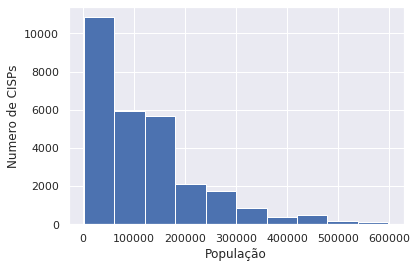

In [0]:
sns.set()
tmp_data = population_df.loc[population_df['vano'] ==2019]

plt.hist(population_df['pop_circ'])
plt.xlabel('População')
plt.ylabel('Numero de CISPs')
plt.show()

**Agrupando por cidade**  

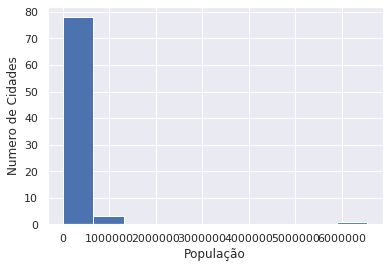

In [0]:
tmp_data = pop_by_munic.loc[pop_by_munic['vano'] ==2019]

plt.hist(tmp_data['pop_circ'])
plt.xlabel('População')
plt.ylabel('Numero de Cidades')
plt.show()

## Análises básicas

Dados normalizados por 100k habitantes

In [0]:
crimes_pop.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578,1545
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441,29790
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637,35656
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473,76271
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147,38659


In [0]:
crimes_pop['per100k_ratio'] = 100000 / crimes_pop['pop_circ'] 

cols = crimes_pop.columns[9:-2] # a partir de hom_doloso até registro_ocorrencias

crimes_per100k = crimes_pop.copy()
crimes_per100k[cols].astype(float)

# por algum motivo esses campos dão problema, então tem que fazer transformar pra float na mão
crimes_per100k['posse_drogas'] = pd.to_numeric(crimes_per100k['posse_drogas'], errors='coerce')
crimes_per100k['trafico_drogas']  = pd.to_numeric(crimes_per100k['trafico_drogas'], errors='coerce')
crimes_per100k['apreensao_drogas_sem_autor']  = pd.to_numeric(crimes_per100k['apreensao_drogas_sem_autor'], errors='coerce')

crimes_df['posse_drogas'] = pd.to_numeric(crimes_df['posse_drogas'], errors='coerce')
crimes_df['trafico_drogas']  = pd.to_numeric(crimes_df['trafico_drogas'], errors='coerce')
crimes_df['apreensao_drogas_sem_autor']  = pd.to_numeric(crimes_df['apreensao_drogas_sem_autor'], errors='coerce')

for c in cols:
    crimes_per100k[c] = crimes_per100k[c] * crimes_per100k['per100k_ratio']
    crimes_per100k[c] = crimes_per100k[c].astype(int)
    
crimes_per100k.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ,per100k_ratio
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,64,2588,0,64,970,906,0,323,64,1682,517,0,0,2071,0,647,0,258,6472,776,1941,0,2394,0,5825,10938,0,64,0,4466,64,0,0,0,323,0,0,0,0,1359,129,0,0,0,0,0,4271,323,37411,1545,64.724919
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,10,0,0,0,0,157,3,13,117,16,0,30,3,83,40,0,3,46,3,10,0,36,275,30,140,16,77,0,120,386,0,3,0,3,117,0,0,0,23,0,0,0,0,50,20,0,3,0,0,10,171,30,1480,29790,3.356831
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,8,0,0,0,2,204,5,2,53,28,2,30,14,72,11,5,0,95,5,11,0,67,344,78,117,5,131,0,272,605,0,0,0,103,11,0,0,0,28,0,0,0,0,131,5,2,0,0,0,8,179,30,1786,35656,2.804577
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,7,0,0,0,2,56,2,1,26,13,0,35,7,18,28,0,0,26,0,7,0,49,187,22,5,0,10,0,79,118,0,0,0,10,26,0,0,0,100,0,0,0,0,34,2,1,0,0,0,7,73,35,620,76271,1.311114
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,10,0,0,0,5,46,5,0,5,0,5,59,2,10,0,0,0,2,0,2,0,59,142,31,2,0,2,0,54,90,0,0,0,10,7,0,0,0,23,0,0,0,0,25,2,7,0,0,0,10,12,59,380,38659,2.586720


In [0]:
crimes_df.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147


Agrupando dataset por município

In [0]:
tmp_data = crimes_df.groupby(['munic'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data = tmp_data.drop(columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor' ,
                                      'indicador_roubo_rua', 'indicador_roubo_veic'])
print(tmp_data.head())
tmp_data['total_crime']= tmp_data.iloc[:, :-1].sum(axis=1) ## até -1 pq só tem o registro_ocorrencias ainda no final
total_crimes_munic = tmp_data
total_crimes_munic = total_crimes_munic.sort_values(['total_crime'], ascending=[False])
total_crimes_munic.head()


                munic  hom_doloso  ...  pol_civis_mortos_serv  registro_ocorrencias
0      Angra dos Reis        1253  ...                      0                 89454
1            Araruama         833  ...                      0                 76521
2  Armação dos Búzios         365  ...                      1                 43490
3     Arraial do Cabo          77  ...                      0                 12833
4         Barra Mansa         672  ...                      1                 75395

[5 rows x 46 columns]


,munic,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,total_crime
68,Rio de Janeiro,29556,367,1288,8980,30488,488331,24140,11592,295195,48206,9484,307032,49067,566129,92258,305,410.0,118163,1469,17810,483.0,193086,148246,282727,97735,190588,4207.0,746595,59,14614,984,260859,92704,229396,140136.0,37013.0,84289.0,8256.0,423487,36891,4709,184,291,48,5709728,5097857.0
78,São Gonçalo,6185,18,204,1055,4162,63355,3864,2237,31688,7250,1471,43131,7746,88061,12209,13,39.0,11350,84,1531,14.0,15180,17674,17961,3970,8452,118.0,56088,8,1088,69,16314,10656,34901,19996.0,6474.0,7709.0,312.0,68933,4501,360,28,15,2,606714,576476.0
23,Duque de Caxias,7439,30,211,1512,4404,70151,4276,2071,29875,5164,1090,48249,9194,76101,14900,13,27.0,13422,112,1962,28.0,17371,16402,18744,3682,9127,138.0,51135,12,967,83,19954,8581,34817,20132.0,5489.0,7910.0,260.0,58455,5328,623,34,14,1,599767,569490.0
50,Nova Iguaçu,6785,32,160,625,3351,60658,4881,1515,25492,4215,895,32631,3828,57907,6793,6,36.0,10966,64,1243,13.0,10019,14392,14318,2885,7403,150.0,41744,10,927,45,15514,5409,14586,14578.0,3590.0,8690.0,214.0,57292,4894,329,24,5,0,468875,439114.0
48,Niterói,2295,24,107,862,2577,40648,2114,1088,27472,5029,1594,19829,1214,45678,8152,36,37.0,7766,196,1095,60.0,9623,22908,22100,4710,12825,758.0,65426,9,1744,143,21267,8345,13970,13837.0,4649.0,8780.0,925.0,40655,2477,392,26,12,1,463564,423455.0


Normalização depois da soma

In [0]:
tmp_data = crimes_df.groupby(['munic', 'vano'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data = tmp_data.drop(columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor' ,
                                      'indicador_roubo_rua', 'indicador_roubo_veic'])
tmp_data['total_crime']= tmp_data.iloc[:, :-1].sum(axis=1)
total_crimes_munic_vano = tmp_data
total_crimes_munic_vano = total_crimes_munic_vano.sort_values(['total_crime'], ascending=[False])

join_pop_crimes_munic = pd.merge(total_crimes_munic_vano, pop_by_munic, how='inner', on=['munic','vano'])
join_pop_crimes_munic = join_pop_crimes_munic.drop('mes', 1)

# join_pop_crimes_munic = join_pop_crimes_munic.loc[join_pop_crimes_munic['vano'] == 2018]
join_pop_crimes_munic['per100k_ratio'] = 100000 / join_pop_crimes_munic['pop_circ'] 

print(join_pop_crimes_munic.head())
cols = join_pop_crimes_munic.columns[2:-2] 

join_pop_crimes_munic[cols].astype(float)

for c in cols:
    join_pop_crimes_munic[c] = join_pop_crimes_munic[c] * join_pop_crimes_munic['per100k_ratio']
    join_pop_crimes_munic[c] = join_pop_crimes_munic[c].astype(int)


# crimes_per100k_2.loc[crimes_per100k_2['munic'] == 'Laje do Muriaé']

crimes_per100k_2 = join_pop_crimes_munic.groupby(['munic'], as_index=False).sum()
crimes_per100k_2 = crimes_per100k_2.drop('vano', 1)
crimes_per100k_2 = crimes_per100k_2.sort_values(['total_crime'], ascending=[False])
crimes_per100k_2.head()


            munic  vano  hom_doloso  ...  total_crime  pop_circ  per100k_ratio
0  Rio de Janeiro  2014        1237  ...     353431.0   6441790       0.015524
1  Rio de Janeiro  2016        1330  ...     345264.0   6487724       0.015414
2  Rio de Janeiro  2017        1492  ...     337664.0   6523642       0.015329
3  Rio de Janeiro  2015        1200  ...     335009.0   6465146       0.015468
4  Rio de Janeiro  2018        1338  ...     334327.0   6573410       0.015213

[5 rows x 50 columns]


,munic,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,total_crime,pop_circ,per100k_ratio
35,Laje do Muriaé,117,13,12,26,530,11440,530,239,2125,12,38,26,13,196,26,0,0,13,0,0,0,52,185,183,13,382,135,6248,0,52,13,987,3751,223,2763,330,2071,65,7879,224,116,0,0,0,53449,498797,127091,227.550648
66,Rio das Flores,146,0,0,0,126,12814,574,205,3187,47,80,93,56,61,0,12,0,0,0,0,0,168,158,127,35,421,22,6151,0,67,0,1131,2128,317,1627,105,1480,0,10553,349,126,0,0,0,53106,443315,145311,199.333675
83,São Sebastião do Alto,320,0,11,0,448,8742,399,588,4606,98,133,262,207,43,0,0,0,11,0,0,0,264,285,52,22,407,11,4260,0,22,0,587,1082,312,2141,156,1295,22,8536,97,110,0,0,0,46701,420739,151001,191.490772
69,Santa Maria Madalena,331,0,0,0,371,8632,527,274,2976,37,130,382,55,64,0,9,0,18,0,0,0,255,624,27,0,748,18,6304,0,64,9,777,778,672,1598,150,1445,28,8269,67,225,0,0,0,50503,367762,175209,164.957209
86,Trajano de Morais,225,18,0,0,217,8601,515,345,2105,94,210,158,46,101,9,9,0,9,0,0,0,197,379,226,37,421,56,5464,0,27,0,642,662,543,1481,64,748,9,9532,171,228,0,0,0,47254,366484,174667,165.471617


In [0]:
tmp_data = crimes_per100k.groupby(['munic'], as_index=False)[ crimes_per100k.columns[9:]].sum()
tmp_data1 = tmp_data.drop(columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'indicador_roubo_rua', 'indicador_roubo_veic'])

tmp_data1['total_crime']= tmp_data1.iloc[:, 1:-3].sum(axis=1)

total_crimes_munic_100k = tmp_data1
total_crimes_munic_100k = total_crimes_munic_100k.sort_values(['total_crime'], ascending=[False])

total_crimes_munic_100k.head()


,munic,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,pop_circ,per100k_ratio,total_crime
68,Rio de Janeiro,19379,251,1388,4719,26161,597325,18532,9387,403194,94903,6302,230309,75483,1201825,138751,1924,1889,284372,6561,77209,465,276282,199762,1388479,221306,764345,7584,1984228,18,40891,875,1390416,145567,177691,329685,90743,212745,24290,526044,36511,5908,252,107,8,13472765,1263503520,19358.078904,11024066
48,Niterói,2156,12,73,601,2297,45005,1988,917,30861,4896,1649,19803,1005,47596,8043,24,25,7801,158,980,36,9600,22943,24634,4637,13775,689,74872,4,1521,108,22822,8393,14279,14298,4683,9101,791,45257,2348,303,16,6,0,509443,97523217,1129.912449,451006
78,São Gonçalo,2277,0,9,234,1360,26456,1215,618,13315,2681,296,17871,2600,36986,4921,0,1,4326,1,341,0,5885,6997,7249,1417,3288,9,23384,0,180,3,6223,4230,13493,8418,2571,3115,41,28596,1507,36,2,0,0,254694,200231110,343.832148,232152
23,Duque de Caxias,3187,3,26,406,1649,30208,1599,713,12781,1773,320,18103,3047,27706,5018,0,1,4423,9,453,7,6130,5626,5612,1050,3260,70,19986,0,198,11,6534,3483,12970,8585,2102,3353,50,24869,1933,168,6,0,0,239455,171185910,584.815508,217428
50,Nova Iguaçu,2065,2,5,113,935,22546,1497,326,9946,1430,146,13034,1372,24182,2527,0,3,4223,5,438,0,3856,6176,6858,1007,2902,28,18198,1,220,5,7082,1802,5976,5566,1222,3492,50,21685,1463,20,1,0,0,192902,158863718,244.680198,172405


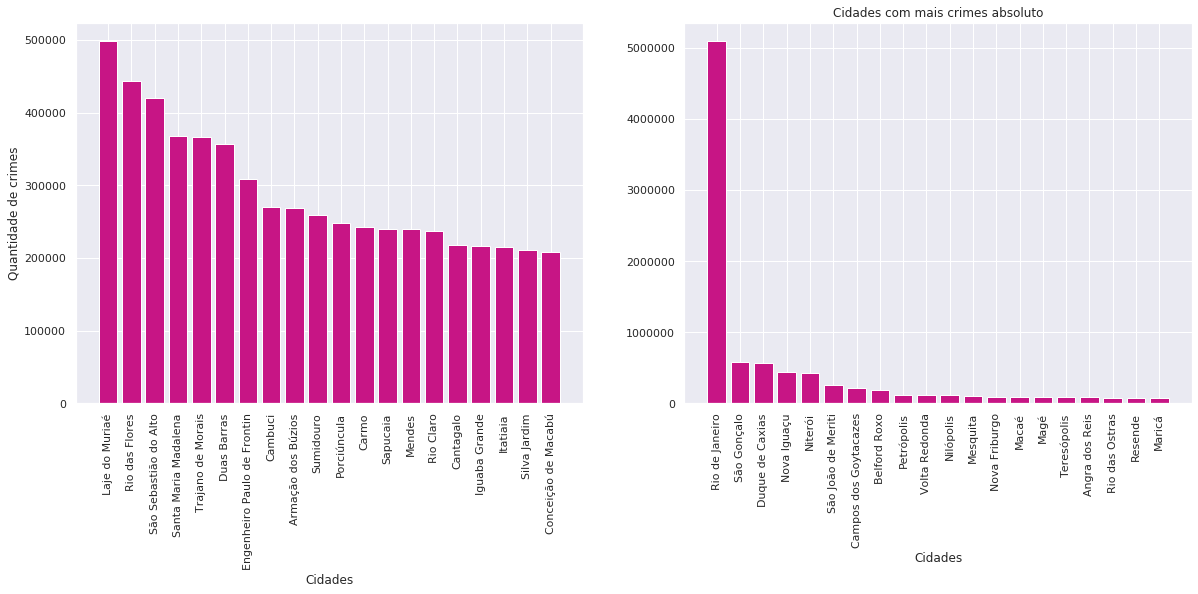

In [0]:
f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(20)

# tmp_data = total_crimes_munic_per_year100k.loc[total_crimes_munic_per_year100k['vano'] ==2019]

plt.bar(y_pos, crimes_per100k_2['total_crime'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, crimes_per100k_2['munic'].head(20), rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Quantidade de crimes')
# plt.title('Cidades com mais crimes por 100k habitantes (somando tudo primeiro por municipio e ano)')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_munic['total_crime'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_munic['munic'].head(20), rotation = 90)
plt.xlabel('Cidades')
plt.title('Cidades com mais crimes absoluto')

plt.show()


Laje do Muriaé é uma das cidades com mais crimes na taxa por 100k mas em números absolutos é uma das que menos tem ocorrencias.  
Uma coisa que corrobora com esse grafico é http://arquivos.proderj.rj.gov.br/isp_imagens/uploads/DossieCriancaAdolescente2018.pdf na página 58 tem uma tabela e da pra ver que Laje do Muriaé é uma das que tem maior taxa de violência fisica.

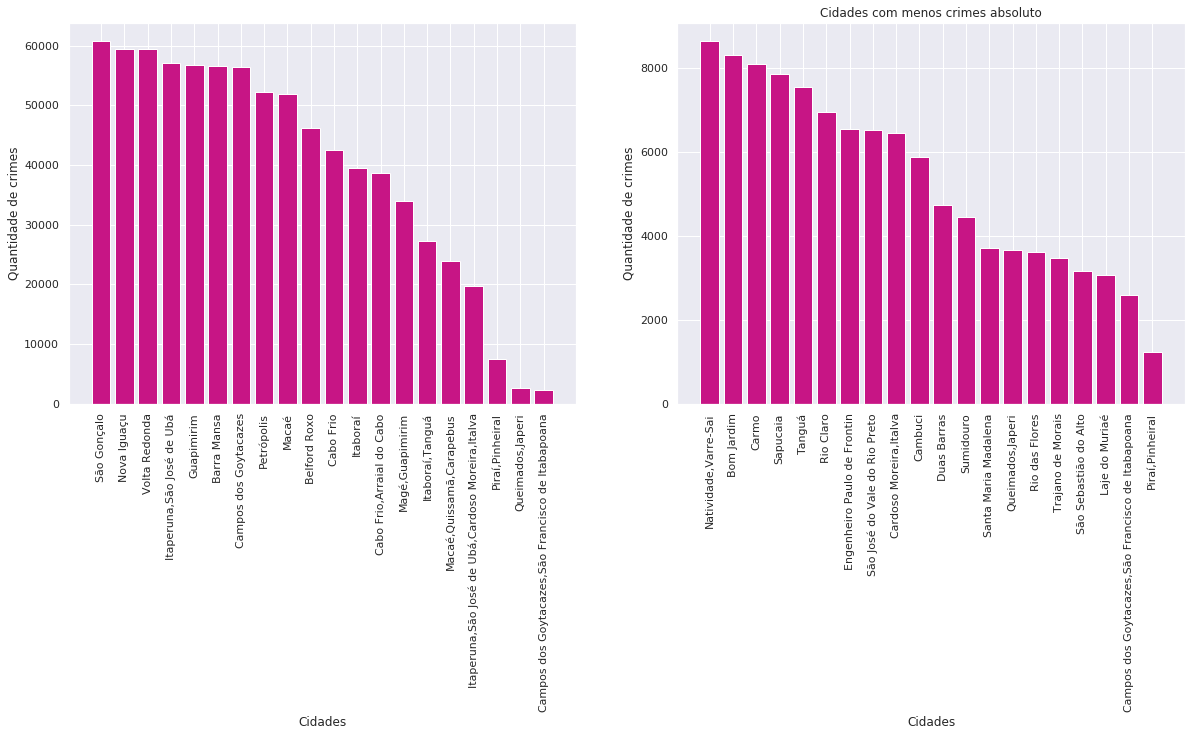

In [0]:
f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(20)

# tmp_data = total_crimes_munic_per_year100k.loc[total_crimes_munic_per_year100k['vano'] ==2019]

plt.bar(y_pos, crimes_per100k_2['total_crime'].tail(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, crimes_per100k_2['munic'].tail(20), rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Quantidade de crimes')
# plt.title('Cidades com menos crimes por 100k habitantes (somando tudo primeiro por municipio e ano)')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_munic['total_crime'].tail(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_munic['munic'].tail(20), rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Quantidade de crimes')
plt.title('Cidades com menos crimes absoluto')

plt.show()


CIDADES COM MAIS CRIMES (NORMALIZADO)

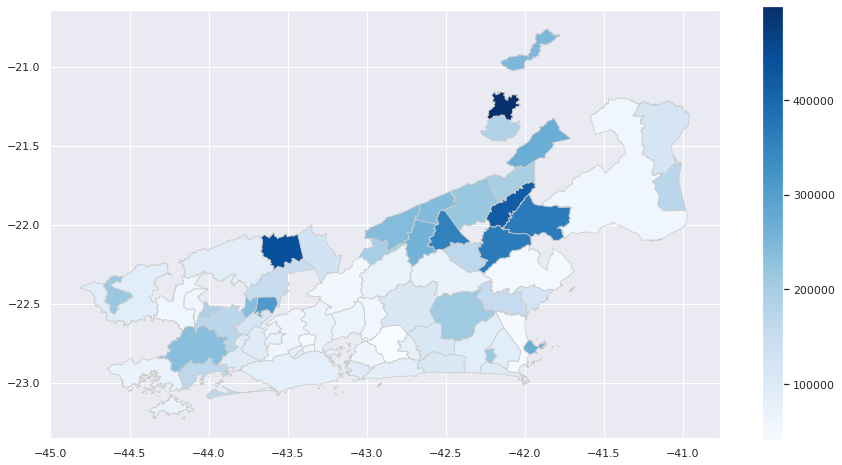

In [0]:
map_df = gpd.read_file('brazil.shp')
map_df = pd.merge(map_df, crimes_per100k_2, how='inner', left_on='NOME', right_on='munic')

map_df.plot(column=map_df['total_crime'], cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True, figsize=(15,8))

# ADICIONA LABELS NO MAPA -------------------------------------------
# ax = map_df.plot(column=map_df['total_crime'], cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True, figsize=(15,8))

# map_df.apply(lambda x: ax.annotate(s=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

Se eu coloco os nomes nos estados fica muito poluído, talvez seja legal pegar os de destaque e colocar os nomes na mão caso for usar no relatório  

CIDADES COM MAIS CRIMES (ABSOLUTO)

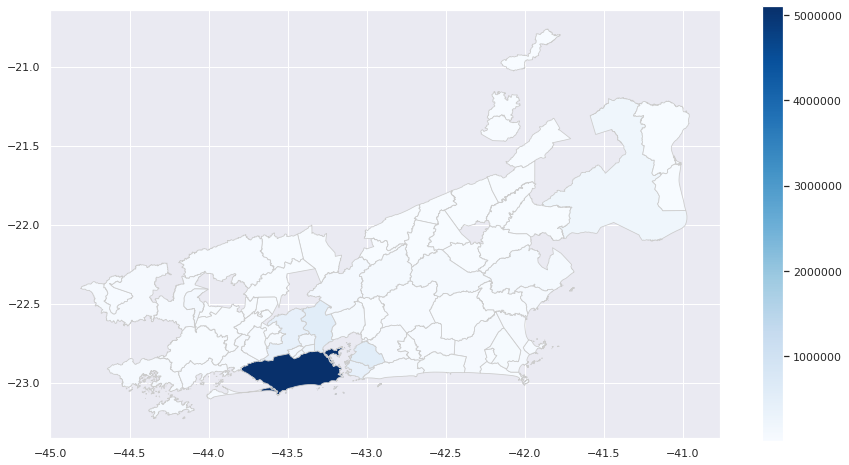

In [0]:
map_df = gpd.read_file('brazil.shp')
map_df = pd.merge(map_df, total_crimes_munic, how='inner', left_on='NOME', right_on='munic')

map_df.plot(column=map_df['total_crime'], cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True, figsize=(15,8))

Rio de Janeiro absurdamente maior, nem vale a pena usar esse mapa

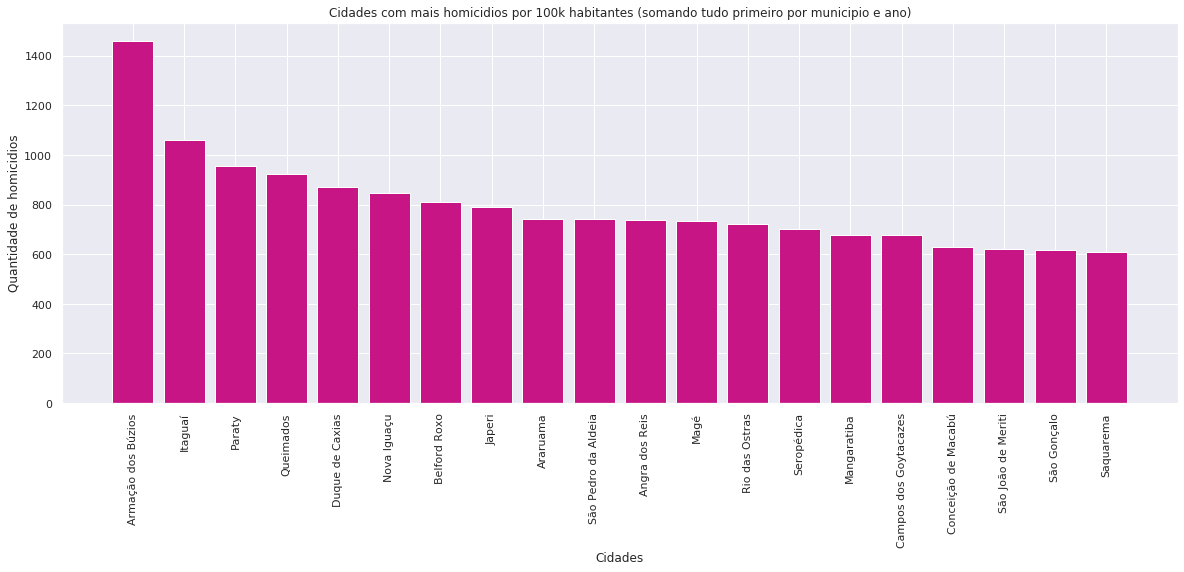

In [0]:
f = plt.figure(figsize=(20,7))
y_pos = np.arange(20)

tmp_data = crimes_per100k_2.sort_values(['hom_doloso'], ascending=[False])

plt.bar(y_pos, tmp_data['hom_doloso'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, tmp_data['munic'].head(20), rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Quantidade de homicidios')
plt.title('Cidades com mais homicidios por 100k habitantes (somando tudo primeiro por municipio e ano)')

plt.show()

Gráfico acima faz sentido. 

Em 2017:

*Entre as dez cidades mais violentas do estado, cinco se encontravam
na Região Metropolitana, sendo Queimados (115,6) a cidade que possuía a maior taxa de
homicídio. O alto índice de violência nesse município é correlacionado, entre outros fatores,
com a presença e disputa por território entre milícia e tráfico de drogas na região.30 Os outros
dois municípios mais violentos da UF pertencem ao Sul Fluminense: Porto Real (100,0) e
Paraty (87,3). A capital fluminense possuía taxa estimada de homicídio de 35,6.*

**Página 30,** daqui http://www.ipea.gov.br/portal/images/stories/PDFs/relatorio_institucional/190802_atlas_da_violencia_2019_municipios.pdf


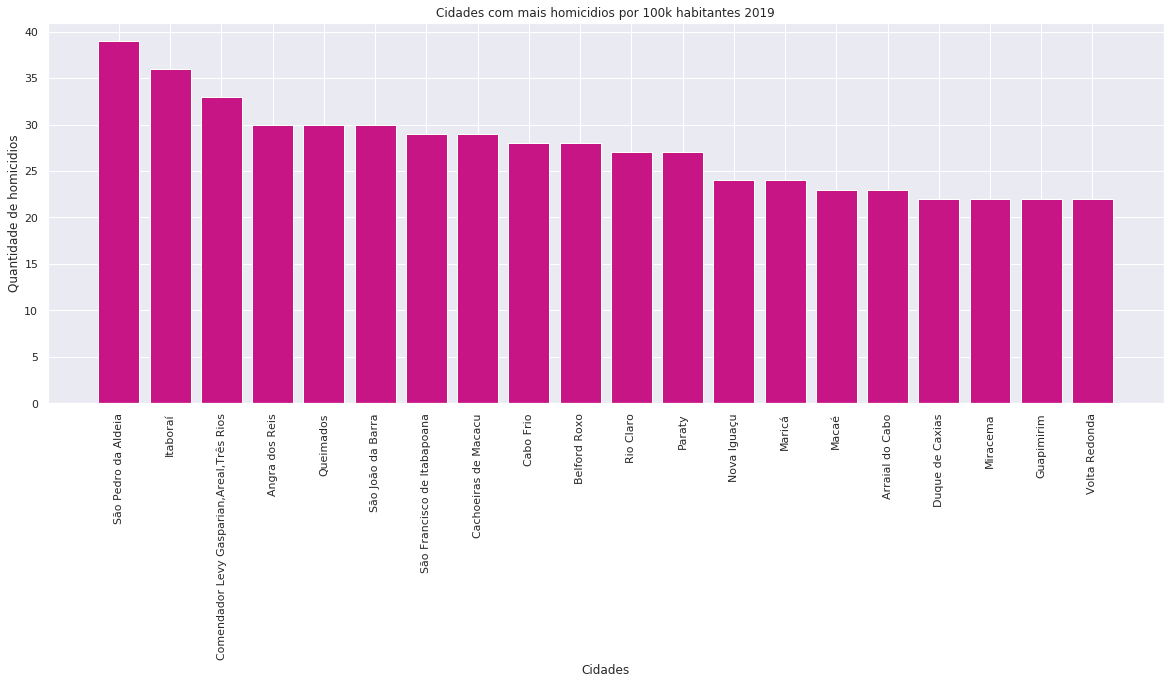

In [0]:
tmp_data = join_pop_crimes_munic.loc[join_pop_crimes_munic['vano'] == 2019]

tmp_data =  tmp_data.groupby(['munic'], as_index=False).sum()
tmp_data =  tmp_data.drop('vano', 1)
tmp_data =  tmp_data.sort_values(['hom_doloso'], ascending=[False])
tmp_data.head()

f = plt.figure(figsize=(20,7))
y_pos = np.arange(20)

plt.bar(y_pos, tmp_data['hom_doloso'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, tmp_data['munic'].head(20), rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Quantidade de homicidios')
plt.title('Cidades com mais homicidios por 100k habitantes 2019')

plt.show()

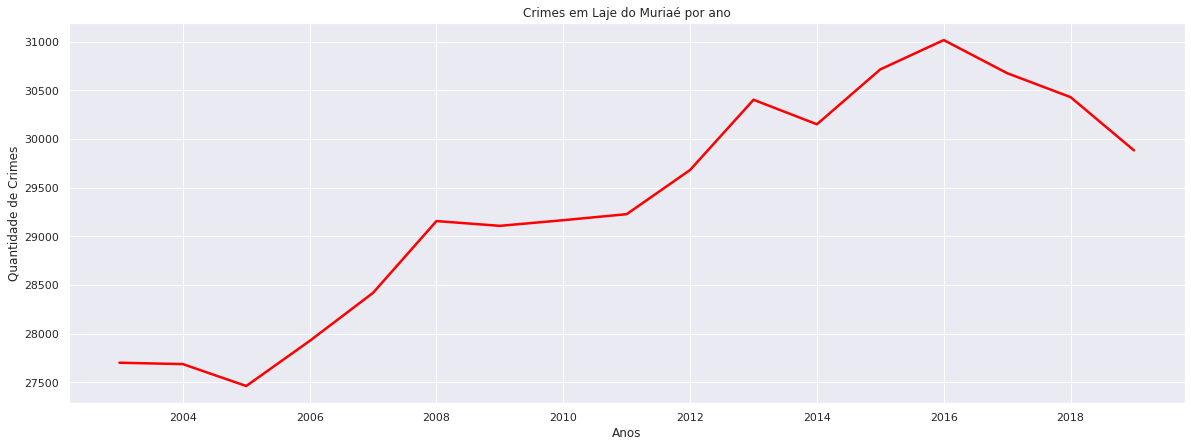

In [0]:
tmp_data = join_pop_crimes_munic.loc[join_pop_crimes_munic['munic'] == 'Laje do Muriaé']

f = plt.figure(figsize=(20,7))

tmp_data = tmp_data.sort_values(['vano'], ascending=[True])

plt.plot(tmp_data['vano'], tmp_data['total_crime'] , color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Anos')
plt.ylabel('Quantidade de Crimes')
plt.title('Crimes em Laje do Muriaé por ano')
plt.show()

Agrupando dataset por município e por ano

In [0]:
tmp_data = crimes_df.groupby(['munic', 'vano'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data = tmp_data.drop(columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor' ,
                                      'indicador_roubo_rua', 'indicador_roubo_veic'])
tmp_data['total_crime']= tmp_data.iloc[:, 2:-1].sum(axis=1) # 2 pra não pegar o ano
total_crimes_munic_per_year = tmp_data.sort_values(['total_crime'], ascending=[False])


In [0]:
tmp_data = crimes_per100k.groupby(['munic', 'vano'], as_index=False)[crimes_per100k.columns[9:]].sum()
tmp_data = tmp_data.drop(columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor' ,
                                      'indicador_roubo_rua', 'indicador_roubo_veic'])
tmp_data['total_crime']= tmp_data.iloc[:, 2:-3].sum(axis=1)
total_crimes_munic_per_year100k = tmp_data.sort_values(['total_crime'], ascending=[False])
# tmp_data.head()



Análise temporal da cidade do Rio de Janeiro

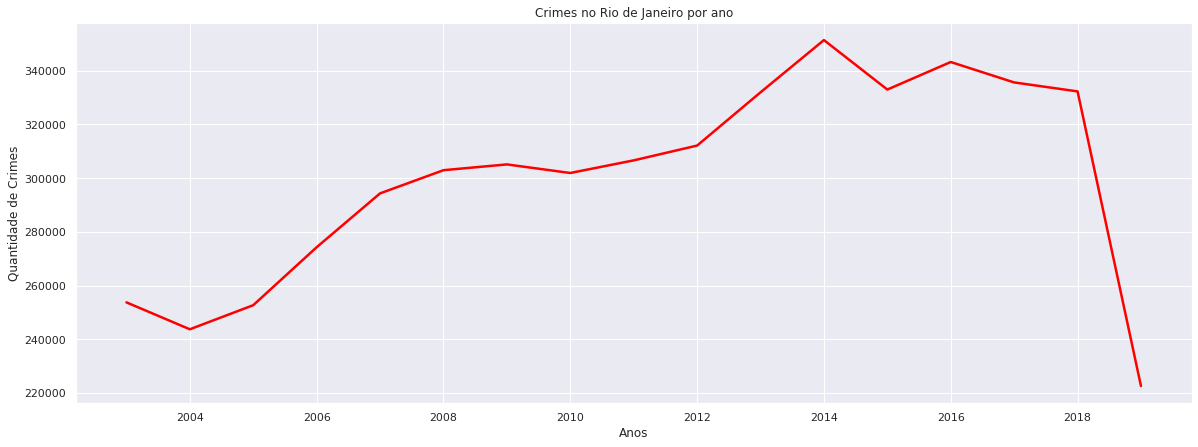

In [0]:
f = plt.figure(figsize=(20,7))

tmp_data = total_crimes_munic_per_year.loc[total_crimes_munic_per_year['munic'] == 'Rio de Janeiro']
tmp_data = tmp_data.sort_values(['vano'], ascending=[True])

plt.plot(tmp_data['vano'], tmp_data['total_crime'] , color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Anos')
plt.ylabel('Quantidade de Crimes')
plt.title('Crimes no Rio de Janeiro por ano')
plt.show()

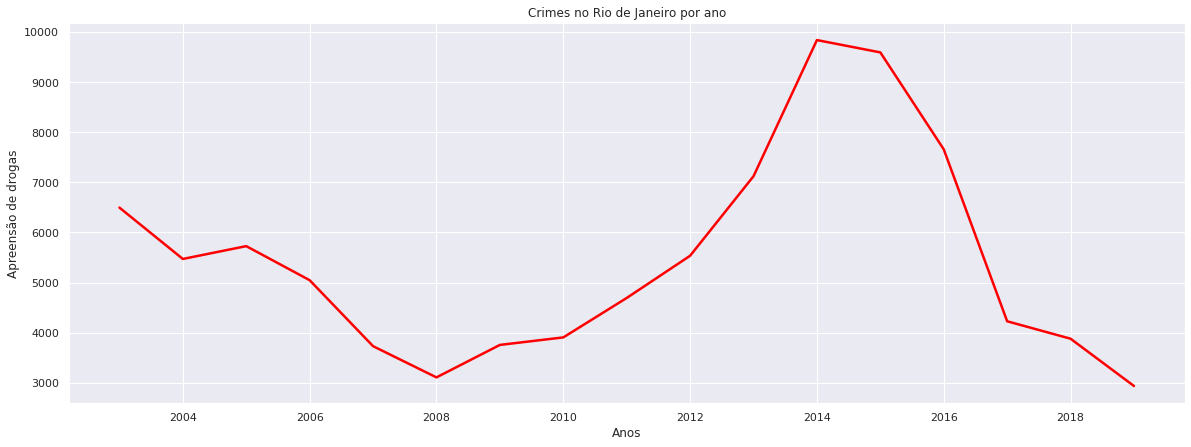

In [0]:
f = plt.figure(figsize=(20,7))

tmp_data = total_crimes_munic_per_year.loc[total_crimes_munic_per_year['munic'] == 'Rio de Janeiro']
tmp_data = tmp_data.sort_values(['vano'], ascending=[True])

plt.plot(tmp_data['vano'], tmp_data['apreensao_drogas'] , color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Anos')
plt.ylabel('Apreensão de drogas')
plt.title('Crimes no Rio de Janeiro por ano')
plt.show()

Variáveis relacionadas à drogas tem pico em 2014 ~ 2015

---



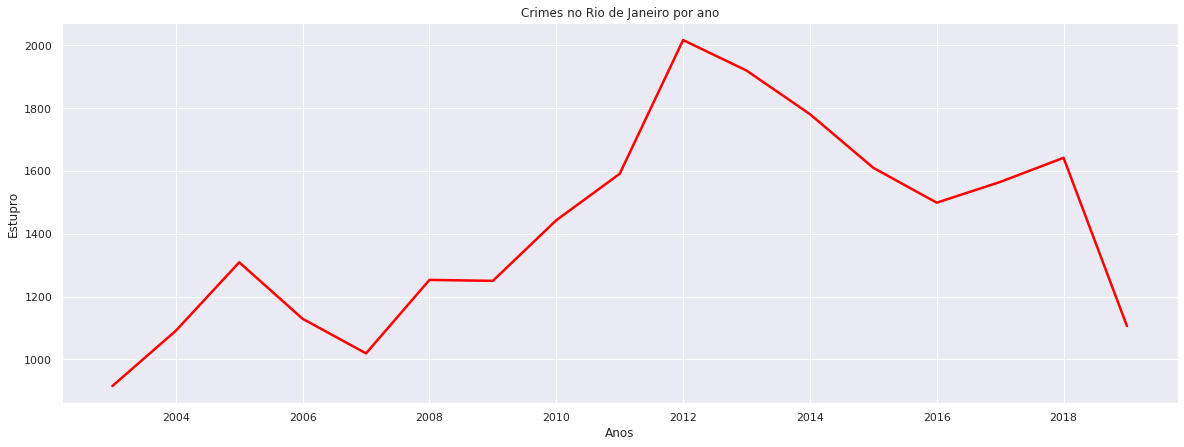

In [0]:
f = plt.figure(figsize=(20,7))

tmp_data = total_crimes_munic_per_year.loc[total_crimes_munic_per_year['munic'] == 'Rio de Janeiro']
tmp_data = tmp_data.sort_values(['vano'], ascending=[True])

plt.plot(tmp_data['vano'], tmp_data['estupro'] , color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Anos')
plt.ylabel('Estupro')
plt.title('Crimes no Rio de Janeiro por ano')
plt.show()

In [0]:
tmp_data = crimes_df.groupby(['Regiao', 'vano'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data = tmp_data.drop(columns=['total_roubos', 'total_furtos', 'indicador_letalidade', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor' ,
                                      'indicador_roubo_rua', 'indicador_roubo_veic'])
tmp_data['total_crime']= tmp_data.iloc[:, :-1].sum(axis=1)
total_crimes_regiao_vano = tmp_data
total_crimes_regiao_vano = total_crimes_regiao_vano.sort_values(['total_crime'], ascending=[False])

total_crimes_regiao_vano = pd.merge(total_crimes_regiao_vano, pop_by_regiao, how='inner', on=['Regiao','vano'])
total_crimes_regiao_vano = total_crimes_regiao_vano.drop('mes', 1)

total_crimes_regiao_vano['per100k_ratio'] = 100000 / total_crimes_regiao_vano['pop_circ'] 

cols = total_crimes_regiao_vano.columns[2:-2] 

total_crimes_regiao_vano[cols].astype(float)

for c in cols:
    total_crimes_regiao_vano[c] = total_crimes_regiao_vano[c] * total_crimes_regiao_vano['per100k_ratio']
    total_crimes_regiao_vano[c] = total_crimes_regiao_vano[c].astype(int)


total_crimes_regiao_100k_2 = total_crimes_regiao_vano.groupby(['Regiao'], as_index=False).sum()
total_crimes_regiao_100k_2 = total_crimes_regiao_100k_2.drop('vano', 1)
total_crimes_regiao_100k_2 = total_crimes_regiao_100k_2.sort_values(['total_crime'], ascending=[False])
total_crimes_regiao_100k_2.head()


,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,total_crime,pop_circ,per100k_ratio
1,Capital,465,0,11,136,475,7754,372,173,4685,757,143,4888,769,8925,1451,0,0,1858,13,278,5,3069,2364,4457,1529,3012,62,11812,0,225,7,4101,1462,3647,2186,571,1311,123,6716,578,70,0,0,0,90435,81310,107142699,0.270004
2,Grande Niterói,570,0,11,112,439,7198,408,238,4067,796,216,3950,538,8400,1280,0,0,1191,11,164,2,1557,2688,2550,554,1390,54,8458,0,176,4,2458,1259,3110,2218,697,1100,69,7588,472,42,0,0,0,71376,68469,27406190,1.057322
0,Baixada Fluminense,783,0,14,105,477,8217,539,179,3071,507,117,4008,647,6632,942,0,0,1193,0,180,0,1433,1610,1483,327,875,19,5354,0,94,0,1797,951,2616,1954,502,1154,23,7042,626,45,0,0,0,59460,56755,61983417,0.466768
3,Interior,477,0,4,14,563,8640,512,373,4129,401,159,579,146,1566,220,0,0,262,0,35,0,488,1337,961,237,1004,50,9269,0,110,0,1761,3063,911,2871,560,1333,59,8196,442,76,0,0,0,57298,51884,74680910,0.388913


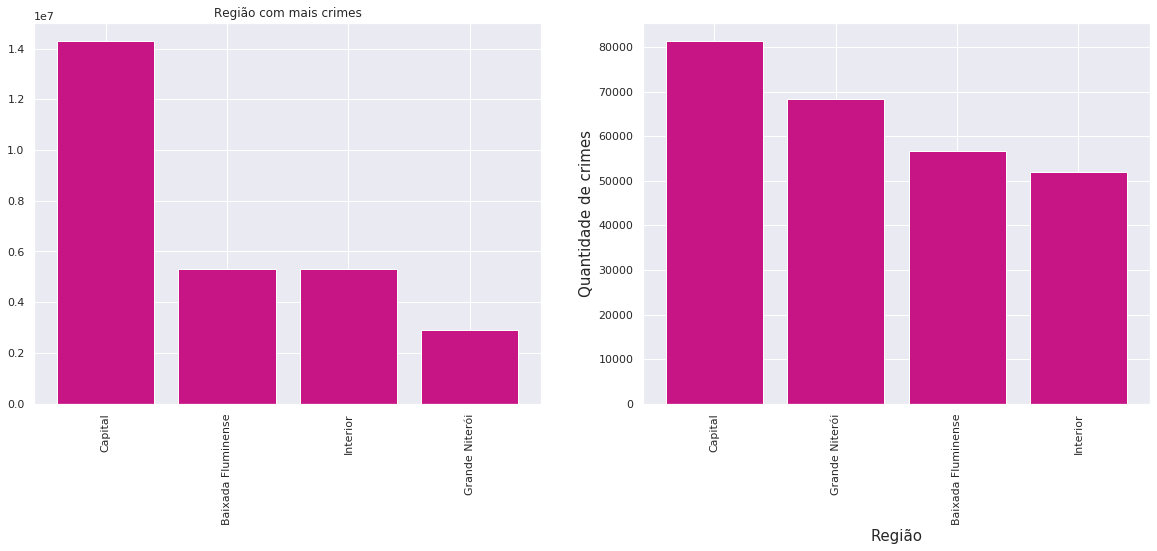

In [0]:

tmp_data = crimes_df.groupby(['Regiao'], as_index=False)[crimes_df.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_regiao = tmp_data
total_crimes_regiao = total_crimes_regiao.sort_values(['total_crime'], ascending=[False])

tmp_data = crimes_per100k.groupby(['Regiao'], as_index=False)[crimes_per100k.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_regiao_100k = tmp_data
total_crimes_regiao_100k = total_crimes_regiao_100k.sort_values(['total_crime'], ascending=[False])

f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(4)

plt.bar(y_pos, total_crimes_regiao['total_crime'], align='center', color = 'mediumvioletred')
plt.xticks(y_pos,total_crimes_regiao['Regiao'], rotation = 90)
plt.title('Região com mais crimes')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_regiao_100k_2['total_crime'], align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_regiao_100k_2['Regiao'], rotation = 90)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Quantidade de crimes', fontsize=15)
# plt.title('Região com mais crimes por 100k habitantes')

plt.show()

In [0]:
delete_columns = ['CISP', 'mes', 'vano', 'mes_ano', 'AISP', 'RISP', 'mcirc', 'Regiao', 'total_roubos', 'total_furtos', 'recuperacao_veiculos', 'encontro_cadaver', 
                  'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv', 'indicador_letalidade', 'indicador_roubo_rua', 'indicador_roubo_veic']

In [0]:
# total_crimes_munic.head()
common_crimes = total_crimes_munic.sum(axis = 0)[1:-2].sort_values(ascending=False)
common_crimes

outros_furtos                1481014
lesao_corp_dolosa            1278365
ameaca                       1159613
roubo_transeunte             1019209
lesao_corp_culposa            651483
roubo_veiculo                 546075
estelionato                   446372
furto_transeunte              421912
recuperacao_veiculos          416855
apf                           380412
furto_veiculos                308964
outros_roubos                 293221
furto_celular                 289835
apreensao_drogas              286860
cmp                           205904
roubo_celular                 194553
roubo_em_coletivo             157932
furto_coletivo                130046
roubo_comercio                 97861
aaapai                         93255
roubo_carga                    89198
hom_doloso                     88717
pessoas_desaparecidas          87267
tentat_hom                     80750
estupro                        73989
hom_culposo                    38912
roubo_apos_saque               29133
e

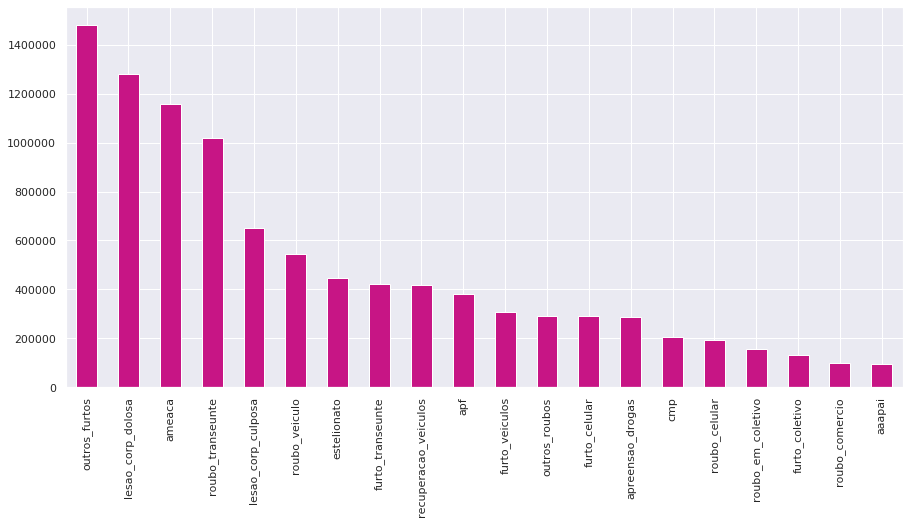

In [0]:
common_crimes[:20].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

# plt.title('Tipos de crime mais comuns',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

Agrupando crimes por Ano e Mês

In [0]:
delete_columns = ['CISP', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc', 'apf', 'Regiao','aaapai', 'cmp', 'cmba', 'recuperacao_veiculos', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']

tmp_data = crimes_df.drop(delete_columns, 1)
tmp_data = tmp_data[tmp_data.columns[:-2]]

tmp_data = tmp_data.groupby(['vano', 'mes'], as_index=False)[tmp_data.columns[2:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 2:].sum(axis=1)
total_crimes = tmp_data
total_crimes.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,ameaca,indicador_letalidade,indicador_roubo_rua,total_crime
0,2003,1,589,6,20,90,365,6896,245,163,3097,589,172,3236,357,1427,658,5,1.0,966,18,210,0.0,2637,10276,1940,983,49,760,0.0,6751,10483,2,23,0,885,1003,0,0,0,6127,705,3051,64785.0
1,2003,2,583,4,12,111,361,7099,221,188,3207,720,170,3169,443,1532,691,12,0.0,963,20,234,0.0,2668,10622,1732,858,53,648,0.0,7044,10335,3,29,0,802,1159,0,0,0,6047,710,3186,65636.0
2,2003,3,613,5,16,113,332,6968,236,188,2993,640,178,2923,310,1537,683,8,1.0,982,33,189,0.0,2476,9960,1833,943,55,647,0.0,7498,10976,0,30,0,821,1133,0,0,0,5793,747,3202,65062.0
3,2003,4,585,11,14,125,297,6441,215,207,3083,702,169,2966,303,1529,624,10,0.0,1007,37,232,0.0,2629,10208,1694,780,57,540,0.0,7338,10409,3,41,0,819,1061,0,0,0,5626,735,3160,63657.0
4,2003,5,599,6,20,96,381,5843,189,228,3282,712,188,3167,345,1558,663,3,1.0,1072,26,273,0.0,2847,10855,1805,812,57,554,0.0,7186,10414,2,57,0,874,1019,0,0,0,5436,721,3293,64584.0


Text(0, 0.5, 'Quantidade de Crimes')

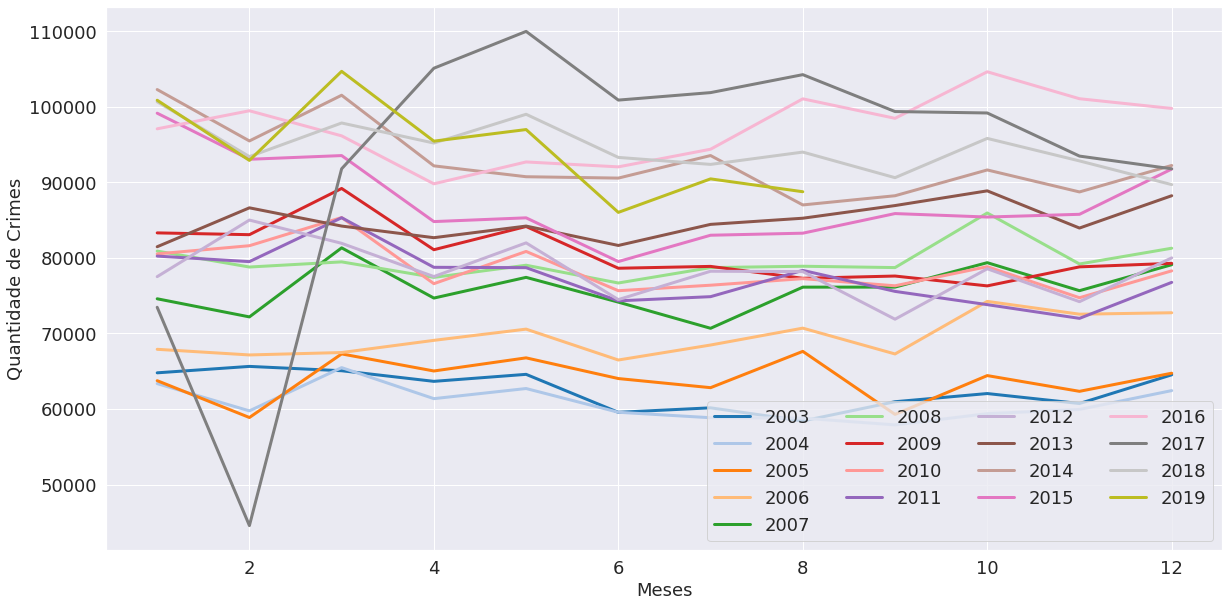

In [0]:
years = total_crimes['vano'].drop_duplicates().tolist()
months = total_crimes['mes'].drop_duplicates()

tmp_array = np.array(total_crimes['total_crime'])
tmp_array = np.append(tmp_array, [None,None,None,None])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

f = plt.figure(figsize=(20,10))

# create a color palette
palette = plt.get_cmap('tab20')

# multiple line plot
for column in range(17):
  plt.plot(months, tmp_array[column], marker='', color=palette(column), linewidth=3, alpha=1, label=years[column])
 
# Add legend
plt.legend(loc='lower right', ncol=4, fontsize=18)
 
# Add titles
# plt.title("A Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Meses", fontsize=18)
plt.ylabel("Quantidade de Crimes", fontsize=18)


**Outlier em Fevereiro de 2017**  
Motivo?

Text(0, 0.5, 'Quantidade de Homicídios')

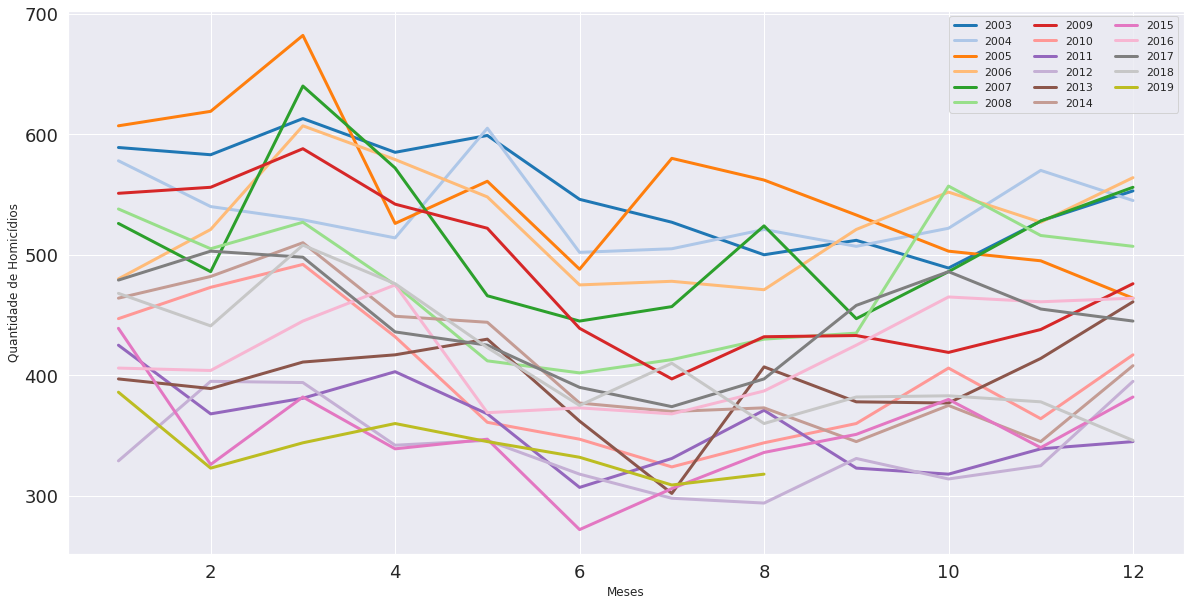

In [0]:
tmp_array = np.array(total_crimes['hom_doloso'])
tmp_array = np.append(tmp_array, [None,None,None,None])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

f = plt.figure(figsize=(20,10))

# multiple line plot
for column in range(17):
  plt.plot(months, tmp_array[column], marker='', color=palette(column), linewidth=3, alpha=1, label=years[column])
 
# Add legend
plt.legend(loc='upper right', ncol=3)
 
# Add titles
# plt.title("A Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Meses")
plt.ylabel("Quantidade de Homicídios")
# plt.title("Homicídio ao longo dos anos")


**Homicídios dimunindo com o tempo.**
Motivo?

Text(0, 0.5, 'Quantidade de Roubos')

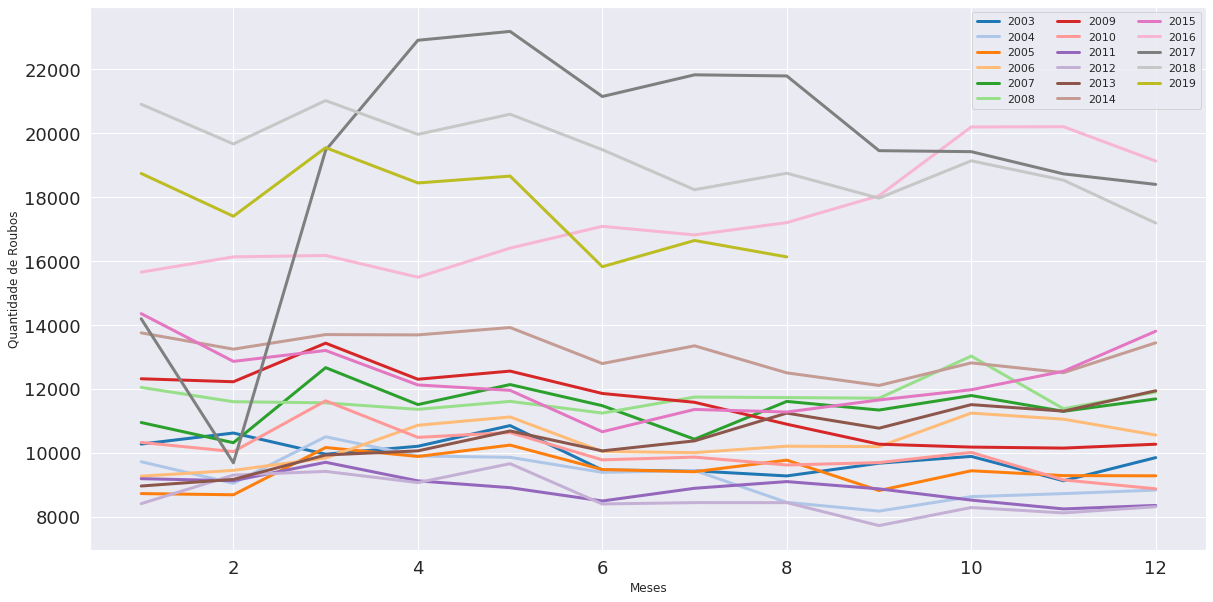

In [0]:
tmp_array = np.array(total_crimes['total_roubos'])
tmp_array = np.append(tmp_array, [None,None,None,None])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

f = plt.figure(figsize=(20,10))

# multiple line plot
for column in range(17):
  plt.plot(months, tmp_array[column], marker='', color=palette(column), linewidth=3, alpha=1, label=years[column])
 
# Add legend
plt.legend(loc='upper right', ncol=3)
 
# Add titles
# plt.title("A Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Meses")
plt.ylabel("Quantidade de Roubos")
# plt.title("Homicídio ao longo dos anos")

In [0]:
crimes_2019 = crimes_pop.loc[crimes_pop['vano'] == 2019]
crimes_2018 = crimes_pop.loc[crimes_pop['vano'] == 2018]
crimes_2017 = crimes_pop.loc[crimes_pop['vano'] == 2017]
crimes_2016 = crimes_pop.loc[crimes_pop['vano'] == 2016]

<Figure size 432x288 with 0 Axes>

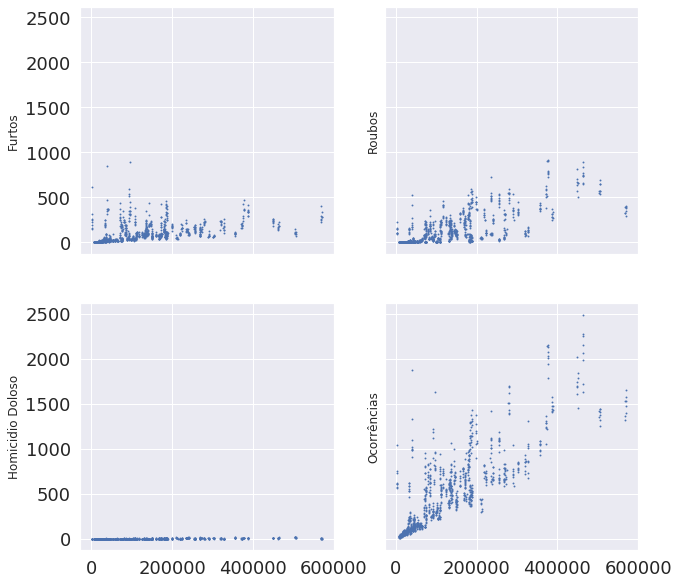

In [0]:
furtos = crimes_2019['total_furtos']
roubos = crimes_2019['total_roubos']
homicidio_dol = crimes_2019['hom_doloso']
ocorrencias = crimes_2019['registro_ocorrencias']
pop = crimes_2019['pop_circ']

f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(10,10))

axes[0][0].scatter(pop, furtos, s= 0.8)
axes[0][0].set_ylabel('Furtos', labelpad = 5)

axes[0][1].scatter(pop, roubos, s= 0.8)
axes[0][1].set_ylabel('Roubos', labelpad = 5)

axes[1][0].scatter(pop, homicidio_dol, s= 0.8)
axes[1][0].set_ylabel('Homicidio Doloso')

axes[1][1].scatter(pop, ocorrencias, s= 0.8)
axes[1][1].set_ylabel('Ocorrências')

plt.show()

Depois seria legal fazer um scatter da soma de todos os crimes por população

#### Fogo Cruzado

In [0]:
tiroteios_df.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado,ano,mes,dia,dia_da_semana
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,2018-01-09,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,9,Tuesday
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,2018-01-19,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,19,Friday
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,2018-01-19,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33,2018,1,19,Friday
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,2016-07-05,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5,Tuesday
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,2016-07-05,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5,Tuesday


Dias da semana com mais ocorrências de tiroteio

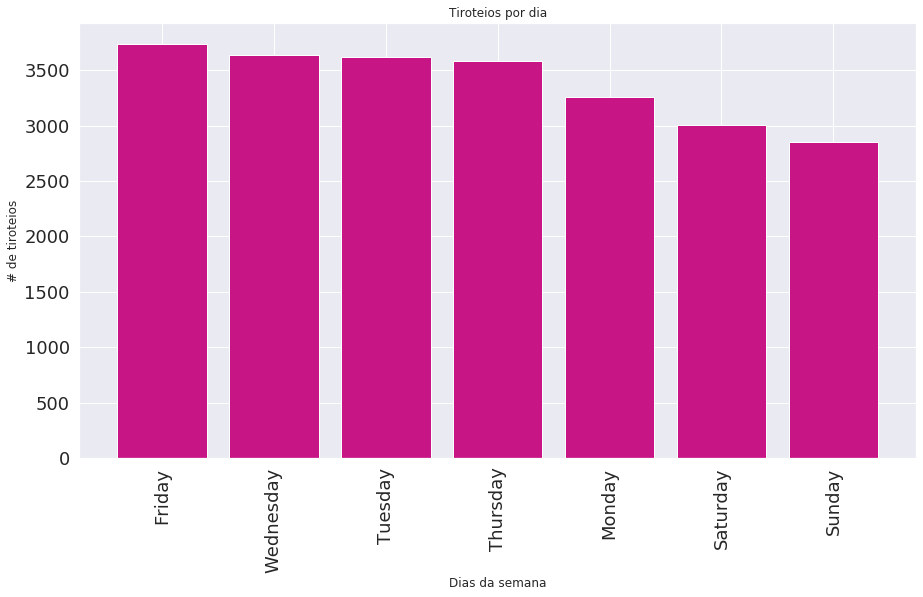

In [0]:
aux = tiroteios_df['dia_da_semana']
tmp_data = tiroteios_df['dia_da_semana'].value_counts().to_dict()

f = plt.figure(figsize=(15,8))
y_pos = np.arange(7)

plt.bar(y_pos, tmp_data.values(), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, tmp_data.keys(), rotation = 90)
plt.xlabel('Dias da semana')
plt.ylabel('# de tiroteios')
plt.title('Tiroteios por dia')

plt.show()

**O fato de ter menos tiroteios durante o final de semana pode ser por conta de ter menos operações policiais nesses dias (?)**

Meses com mais tiroteios

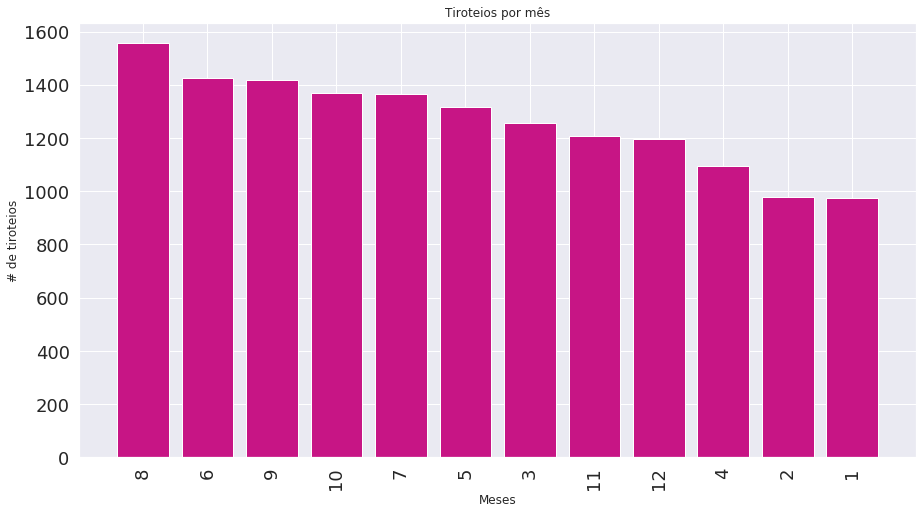

In [0]:
# tirei 2019 e 2016 que estão incompletos, pode prejudicar a análise
aux = tiroteios_df.loc[tiroteios_df['ano'] != 2019]
aux = aux.loc[aux['ano'] != 2016]

tmp_data = aux['mes'].value_counts().to_dict()

f = plt.figure(figsize=(15,8))
y_pos = np.arange(12)

plt.bar(y_pos, tmp_data.values(), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, tmp_data.keys(), rotation = 90)
plt.xlabel('Meses')
plt.ylabel('# de tiroteios')
plt.title('Tiroteios por mês')

plt.show()

**Aparentemente no início e fim de ano temos menos ocorrências**

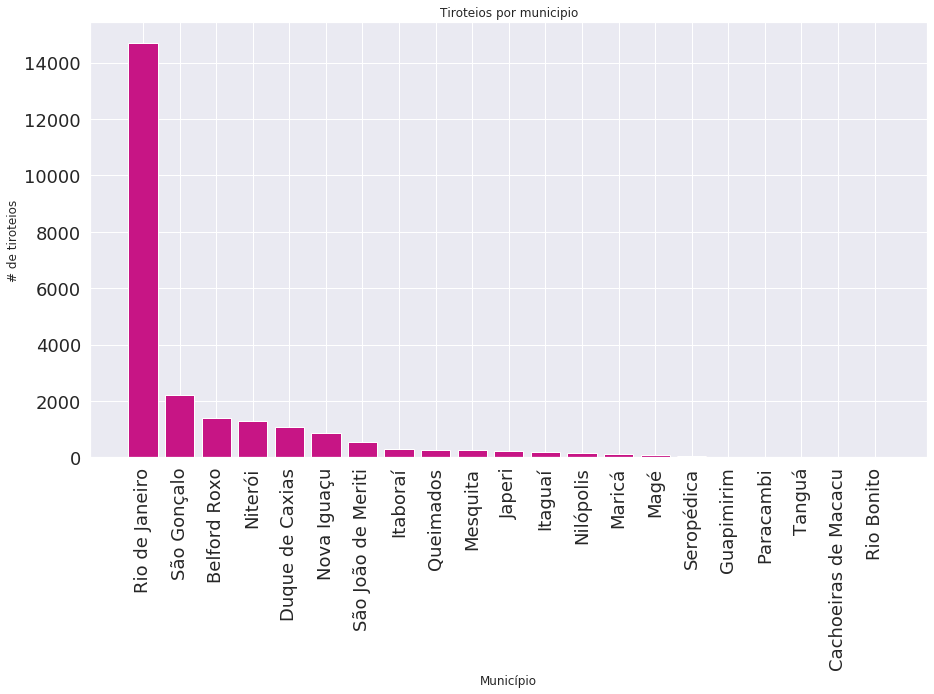

In [0]:
tmp_data = tiroteios_df['nome_cidade'].value_counts().to_dict()

f = plt.figure(figsize=(15,8))
y_pos = np.arange(21)

plt.bar(y_pos, tmp_data.values(), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, tmp_data.keys(), rotation = 90)
plt.xlabel('Município')
plt.ylabel('# de tiroteios')
plt.title('Tiroteios por municipio')

tiroteios_munic = tmp_data
plt.show()

In [0]:
tmp_data = tiroteios_df[['nome_cidade']]
city_count = tmp_data.groupby(['nome_cidade'], as_index=False).size().to_frame('count').reset_index()


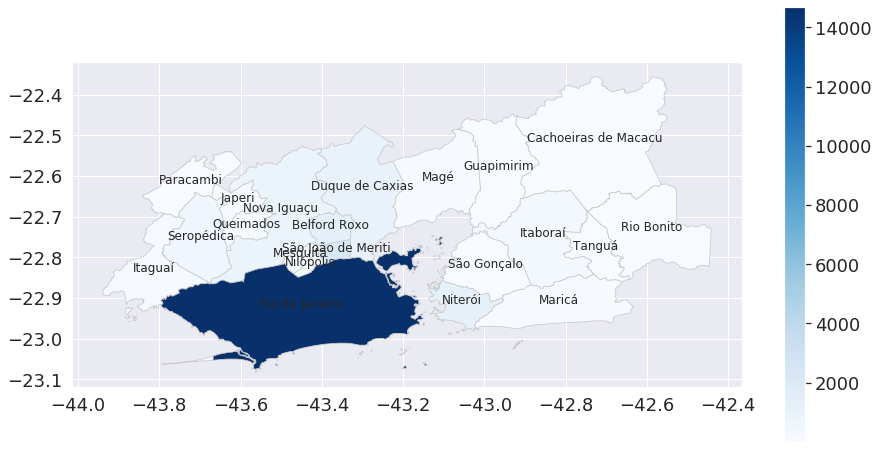

In [0]:
gdf = gpd.GeoDataFrame(
    tiroteios_df, geometry=gpd.points_from_xy(tiroteios_df.longitude_ocorrencia, tiroteios_df.latitude_ocorrencia))

map_df = gpd.read_file('brazil.shp')
map_df = pd.merge(map_df, city_count, how='inner', left_on='NOME', right_on='nome_cidade')
# map_df

ax = map_df.plot(column=city_count['count'], cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True, figsize=(15,8))

map_df.apply(lambda x: ax.annotate(s=x.NOME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


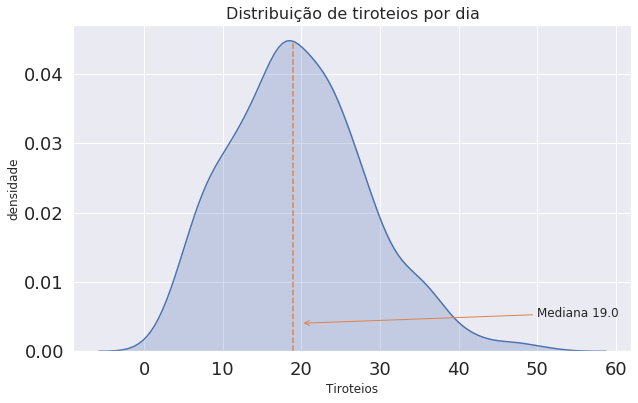

In [0]:
col = sns.color_palette()
plt.figure(figsize=(10, 6))

data = tiroteios_df.groupby('data_ocorrencia').count().iloc[:, 0]

sns.kdeplot(data=data, shade=True)

plt.axvline(x=data.median(), ymax=0.95, linestyle='--', color=col[1])
plt.annotate(
    'Mediana ' + str(data.median()),
    xy=(data.median(), 0.004),
    xytext=(50, 0.005),
    arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))
plt.title(
    'Distribuição de tiroteios por dia', fontdict={'fontsize': 16})
plt.xlabel('Tiroteios')
plt.ylabel('densidade')
plt.legend().remove()
plt.show()

## Começando a trabalhar com o dataset de Feminícidio

In [0]:
feminicidio_df.head()

,CISP,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


In [0]:
feminicidio_per_year = feminicidio_df.groupby(['vano']).sum()

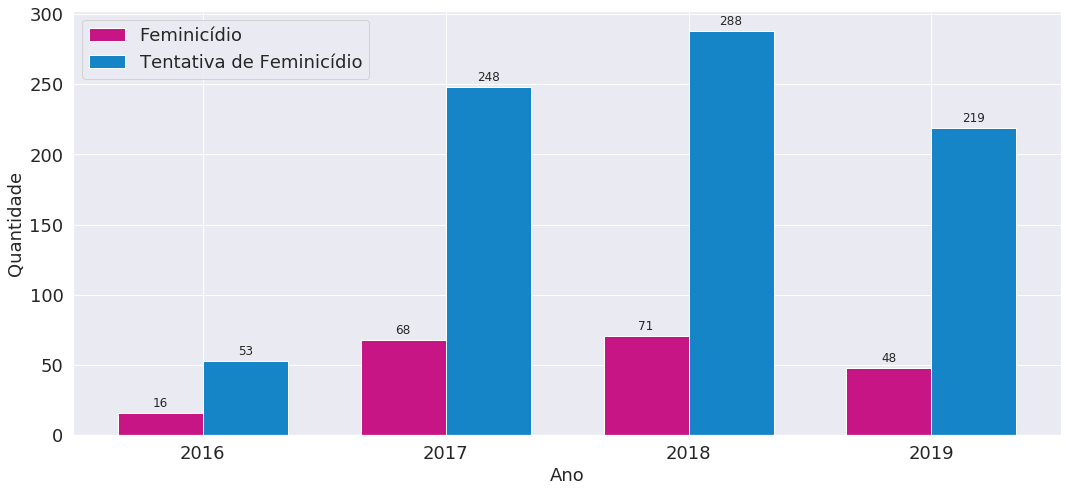

In [0]:
labels = ['2016', '2017', '2018', '2019']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 7))
rects1 = ax.bar(x - width/2, feminicidio_per_year['feminicidio'], width, color='mediumvioletred', label='Feminicídio')
rects2 = ax.bar(x + width/2, feminicidio_per_year['feminicidio_tentativa'], width, color='#1585C7', label='Tentativa de Feminicídio')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Ano', fontsize=18)
ax.set_ylabel('Quantidade', fontsize=18)
# ax.set_title('Números sobre o feminicídio por ano', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=18)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [0]:
def mode(a):
    u, c = np.unique(a, return_counts=True)
    return u[c.argmax()]

In [0]:
feminicidio_df.groupby(['vano']).apply(mode)

vano
2016    0
2017    0
2018    0
2019    0
dtype: int64

In [0]:
fem_2019 = feminicidio_df.loc[feminicidio_df['vano'] == 2019]
fem_2018 = feminicidio_df.loc[feminicidio_df['vano'] == 2018]
fem_2017 = feminicidio_df.loc[feminicidio_df['vano'] == 2017]
fem_2016 = feminicidio_df.loc[feminicidio_df['vano'] == 2016]

In [0]:
fem_2016.head()

,CISP,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


#### seria legal plotar um gráfico com 4 barrinhas (ou 2 pq só 2017 e 2018 tao completos) pra ver a evolução de feminicidio por mes por ano pra ver se tem uma tendencia mensal ao longo dos anos

In [0]:
fem_2016.groupby(['mes']).sum()

,CISP,vano,feminicidio,feminicidio_tentativa,FASE
mes,,,,,
10,11246,278208,2,10,414
11,11246,278208,10,22,414
12,11246,278208,4,21,414


In [0]:
fem_2017.groupby(['mes']).sum()

,CISP,vano,feminicidio,feminicidio_tentativa,FASE
mes,,,,,
1,11246,278346,7,25,414
2,11246,278346,7,14,414
3,11246,278346,6,26,414
4,11246,278346,7,28,414
5,11246,278346,3,12,414
6,11246,278346,7,14,414
7,11246,278346,4,18,414
8,11246,278346,5,24,414
9,11246,278346,6,15,414


In [0]:
sum_fem_mes_2018 = fem_2018.groupby(['mes']).sum()

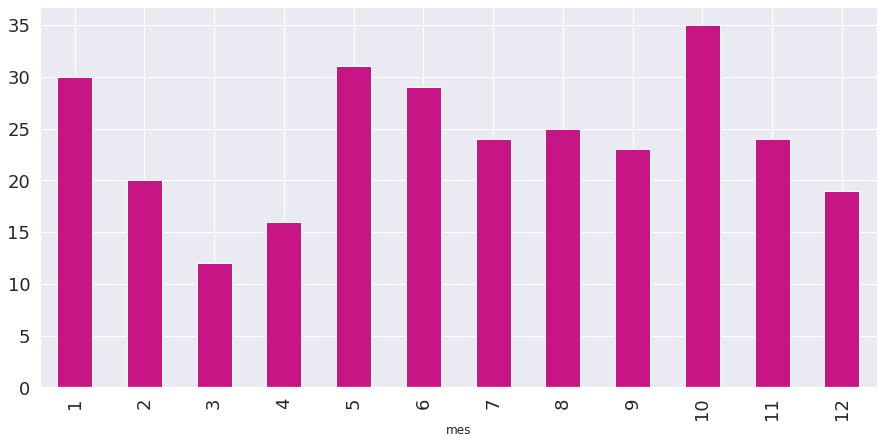

In [0]:
sum_fem_mes_2018['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

In [0]:
sum_fem_mes_2019 = fem_2019.groupby(['mes']).sum()

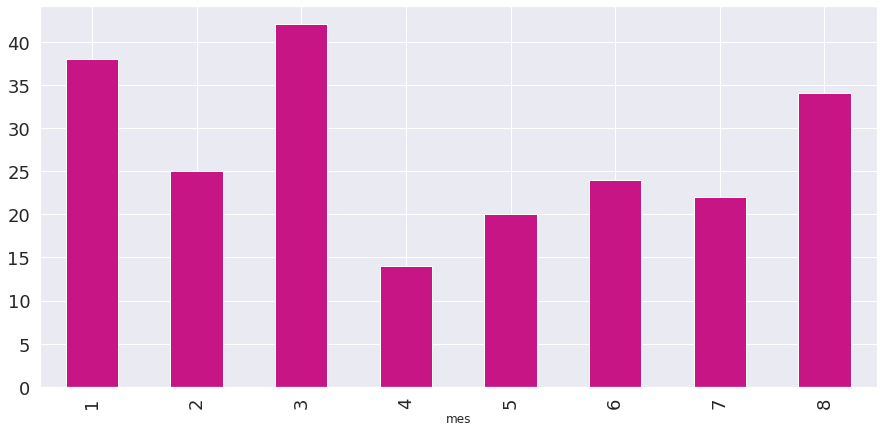

In [0]:
sum_fem_mes_2019['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

### Juntando pop com feminícidio

In [0]:
join_pop_fem = pd.merge(population_df, feminicidio_df, how='inner', on=['CISP','vano', 'mes'])


In [0]:
join_pop_fem.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE
0,1,10,2016,1685,0,0,3
1,1,11,2016,1686,0,0,3
2,1,12,2016,1687,0,0,3
3,1,1,2017,1688,0,0,3
4,1,2,2017,1689,0,0,3


### Juntando o anterior (pop x fem) com o de crimes

Isso pra pegar o nome dos munícipios.

mcirc é o código IBGE deles!!!

In [0]:
join_pop_fem_crimes = pd.merge(join_pop_fem, crimes_df, how='inner', on=['CISP', 'mes', 'vano'])
join_pop_fem_crimes.drop(inplace=True, columns=['mes_ano', 'hom_doloso', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv', 'indicador_letalidade', 'indicador_roubo_rua', 'indicador_roubo_veic', 'registro_ocorrencias'])



In [0]:
join_pop_fem_crimes.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao
0,1,10,2016,1685,0,0,3,5,1,Rio de Janeiro,3304557,Capital
1,1,11,2016,1686,0,0,3,5,1,Rio de Janeiro,3304557,Capital
2,1,12,2016,1687,0,0,3,5,1,Rio de Janeiro,3304557,Capital
3,1,1,2017,1688,0,0,3,5,1,Rio de Janeiro,3304557,Capital
4,1,2,2017,1689,0,0,3,5,1,Rio de Janeiro,3304557,Capital


In [0]:
join_pop_fem_crimes['per100k_ratio'] = 100000 / join_pop_fem_crimes['pop_circ'] 
join_pop_fem_crimes.tail()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao,per100k_ratio
4817,168,4,2019,18203,1,0,3,28,5,Rio Claro,3304409,Interior,5.493600
4818,168,5,2019,18213,0,0,3,28,5,Rio Claro,3304409,Interior,5.490584
4819,168,6,2019,18224,0,0,3,28,5,Rio Claro,3304409,Interior,5.487270
4820,168,7,2019,18235,0,0,2,28,5,Rio Claro,3304409,Interior,5.483959
4821,168,8,2019,18246,0,0,2,28,5,Rio Claro,3304409,Interior,5.480653


In [0]:
fcols = join_pop_fem_crimes.columns[4:6]
# cols
fem_per100k = join_pop_fem_crimes.copy()
fem_per100k[fcols].astype(float)
#fem_per100k['posse_drogas'] = pd.to_numeric(crimes_per100k['posse_drogas'], errors='coerce')
#crimes_per100k['trafico_drogas']  = pd.to_numeric(crimes_per100k['trafico_drogas'], errors='coerce')
#crimes_per100k['apreensao_drogas_sem_autor']  = pd.to_numeric(crimes_per100k['apreensao_drogas_sem_autor'], errors='coerce')

for c in fcols:
    fem_per100k[c] = fem_per100k[c] * fem_per100k['per100k_ratio']
    
fem_per100k.tail(5)

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao,per100k_ratio
4817,168,4,2019,18203,5.4936,0.0,3,28,5,Rio Claro,3304409,Interior,5.493600
4818,168,5,2019,18213,0.0000,0.0,3,28,5,Rio Claro,3304409,Interior,5.490584
4819,168,6,2019,18224,0.0000,0.0,3,28,5,Rio Claro,3304409,Interior,5.487270
4820,168,7,2019,18235,0.0000,0.0,2,28,5,Rio Claro,3304409,Interior,5.483959
4821,168,8,2019,18246,0.0000,0.0,2,28,5,Rio Claro,3304409,Interior,5.480653


In [0]:
sum_fem_100k = fem_per100k.groupby(['munic']).sum()
sum_fem_100k.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,mcirc,per100k_ratio
munic,,,,,,,,,,,
Angra dos Reis,5810,225,70620,7112291,0.499653,10.751226,103,1155,175,115503500,17.238804
Araruama,4130,225,70620,4601094,3.121693,3.761780,103,875,140,115507315,26.641321
Armação dos Búzios,4445,225,70620,1189074,0.000000,5.771584,103,875,140,115508155,103.146938
Arraial do Cabo,4620,225,70620,1043406,6.689670,6.569439,103,875,140,115509030,117.422437
Barra Mansa,3150,225,70620,6347164,0.550688,11.572322,103,980,175,115514245,19.300183


In [0]:
sum_fem = join_pop_fem_crimes.groupby(['munic']).sum()
sum_fem.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,mcirc,per100k_ratio
munic,,,,,,,,,,,
Angra dos Reis,5810,225,70620,7112291,1,22,103,1155,175,115503500,17.238804
Araruama,4130,225,70620,4601094,4,5,103,875,140,115507315,26.641321
Armação dos Búzios,4445,225,70620,1189074,0,2,103,875,140,115508155,103.146938
Arraial do Cabo,4620,225,70620,1043406,2,2,103,875,140,115509030,117.422437
Barra Mansa,3150,225,70620,6347164,1,21,103,980,175,115514245,19.300183


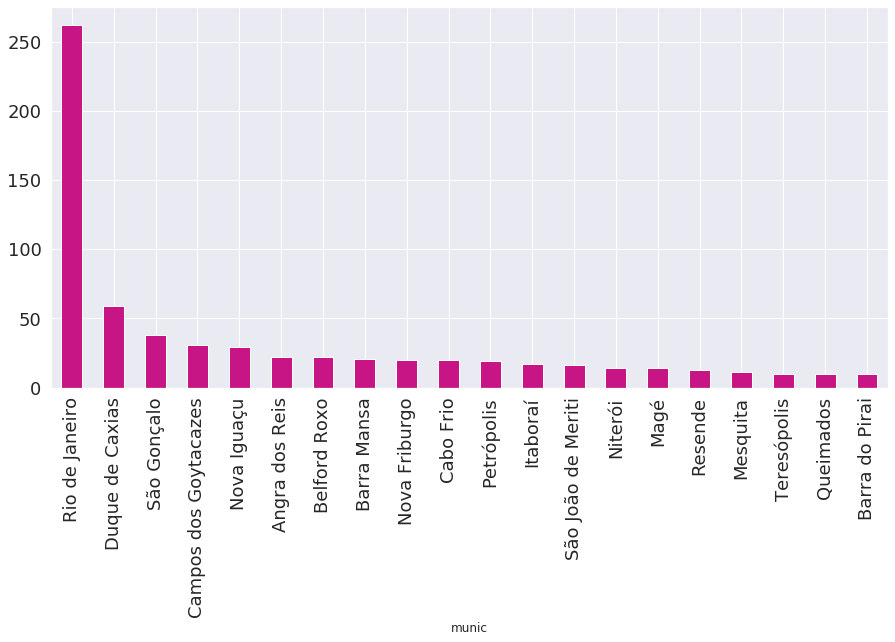

In [0]:
sum_fem['feminicidio_tentativa'].sort_values(ascending=False).nlargest(20).plot.bar(color = 'mediumvioletred', figsize = (15, 7))

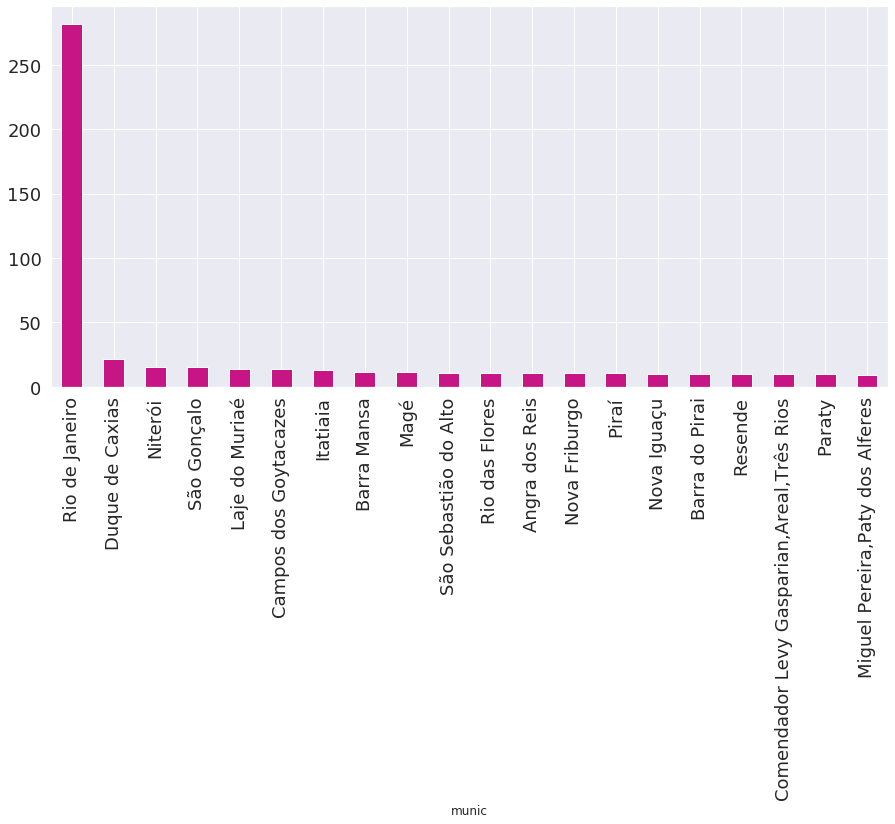

In [0]:
sum_fem_100k['feminicidio_tentativa'].sort_values(ascending=False).nlargest(20).plot.bar(color = 'mediumvioletred', figsize = (15, 7))